In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
import geopandas as gpd
import folium
from folium.plugins import HeatMap

## 재동님 eda

In [2]:
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')
df

Country                         Region    Year  \
0            Afghanistan                           Asia  2007.5   
1                Albania                 Rest of Europe  2007.5   
2                Algeria                         Africa  2007.5   
3                 Angola                         Africa  2007.5   
4    Antigua and Barbuda  Central America and Caribbean  2007.5   
..                   ...                            ...     ...   
174        Venezuela, RB                  South America  2007.5   
175              Vietnam                           Asia  2007.5   
176          Yemen, Rep.                    Middle East  2007.5   
177               Zambia                         Africa  2007.5   
178             Zimbabwe                         Africa  2007.5   

     Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0         71.08125           98.61250       265.804969             0.016125   
1         15.25625           17.14375        83.132969             4.696875   
2         26.75625           31.19375       113.439281             0.400625   
3         88.76875          144.16250       297.844063             4.935625   
4          9.47500           11.51875       142.478813             7.755000   
..             ...                ...              ...                  ...   
174       15.85000           18.50000       151.056156             7.458125   
175       19.50000           24.47500       133.054406             1.742500   
176       52.44375           69.57500       239.653938             0.047000   
177       60.58125           99.20625       452.761219             2.903125   
178       50.16875           85.32500       572.974312             2.900625   

     Hepatitis_B  Measles       BMI    Polio  Diphtheria  Incidents_HIV  \
0        64.5625  24.3750  22.46250  55.3750     55.1250       0.022500   
1        98.0000  95.9375  25.85625  98.1250     98.0625       0.025625   
2        88.3125  93.2500  24.86875  91.7500     91.8750       0.021875   
3        68.8125  64.0000  22.51875  35.7500     55.5625       1.303750   
4        98.2500  75.4375  25.85000  96.9375     98.3125       0.125000   
..           ...      ...       ...      ...         ...            ...   
174      72.4375  83.0000  26.49375  79.1875     75.2500       0.400000   
175      87.4375  65.0000  20.76250  94.9375     91.7500       0.196875   
176      60.1875  95.0000  23.02500  71.6250     72.6250       0.025000   
177      82.8750  39.1875  22.00000  82.9375     83.8125       6.868125   
178      79.5625  64.0000  23.54375  79.5625     79.1250       8.006250   

     GDP_per_capita  Population_mln  Thinness_ten_nineteen_years  \
0          408.5625       27.450625                     16.58125   
1         3071.1250        2.969375                      1.61875   
2         3745.1250       34.820625                      6.09375   
3         2647.8125       21.623750                      6.19375   
4        14678.7500        0.085000                      3.42500   
..              ...             ...                          ...   
174       9294.8750       27.392500                      1.65000   
175       1807.8750       86.032500                     14.92500   
176       2406.8125       21.730625                     13.83125   
177       1059.8750       12.862500                      6.88125   
178       1290.6250       12.538750                      7.01250   

     Thinness_five_nine_years  Schooling  Economy_status  Life_expectancy  
0                    15.58125    2.90000             1.0         59.65625  
1                     1.70000    9.24375             1.0         75.95000  
2                     5.97500    6.99375             1.0         73.78750  
3                     6.66875    4.60625             1.0         52.82500  
4                     3.37500    9.01875             1.0         75.35000  
..                        ...        ...             ...              ...  
174          

- list01 : 분석 타겟을 포함한 1번 카테고리의 컬럼 리스트
- df_1st : 새로 분류한 데이터
- val_1st : 분석 타겟을 제외한 컬럼 리스트

In [3]:
# 1번 카테고리 따로 분류

list01 = ['Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Polio', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']
val_1st = ['Infant_deaths', 'Under_five_deaths', 'Polio', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']

df_1st = df[list01]

#### 각 요소간의 상관관계 평가

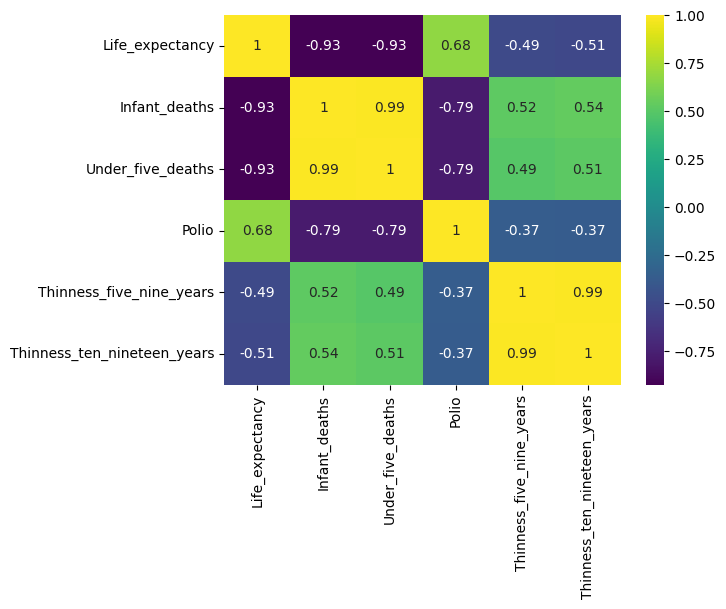

In [4]:
corr_matrix = df_1st.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

- 0에 가까울수록 상관관계가 없고, 1은 양의 상관관계, -1은 음의 상관관계를 보여줌.
#### Life_expectancy(기대수명)과 다른 요소들의 관계:
- Infant_deaths와 Under_five_deaths: 상관계수 -0.93
    - 매우 강한 음의 상관관계.
    - 유아 사망률이나 5세 미만 사망률이 높을수록 기대수명이 낮아진다는 것을 보여줌.
- Polio: 상관계수 0.68
    - 중간 정도의 양의 상관관계.
    - 소아마비 백신 접종률이 높을수록 기대수명이 증가하는 경향.
- Thinness_five_nine_years 및 Thinness_ten_nineteen_years: 상관계수 각각 -0.49, -0.51
    - 약한 음의 상관관계.
    - 저체중율이 높아질수록 기대수명이 감소하는 경향이 있지만, 앞의 변수들에 비해 영향력이 적음.
#### Infant_deaths와 Under_five_deaths:
- 상관계수 0.99
- 거의 완벽한 양의 상관관계.
- 이는 유아 사망률과 5세 미만 사망률이 서로 밀접하게 연결되어 있다는 것을 의미함.
- 실제로 유아 사망은 5세 미만 사망의 주요 구성 요소일 가능성이 큼.
#### Thinness_five_nine_years와 Thinness_ten_nineteen_years:
- 상관계수 0.99
- 거의 완벽한 양의 상관관계.
- 5~9세의 저체중은 10~19세의 저체중까지 밀접한 관계가 있음을 보여줌
#### Polio와 다른 변수들:
- Infant_deaths 및 Under_five_deaths와는 각각 -0.79로 음의 상관관계.
- 소아마비 백신 접종률이 낮은 지역에서 유아 및 5세 미만 사망률이 높다는 것을 시사함.
- Thinness 변수들과는 약한 음의 상관관계(-0.37).
- 백신 접종률이 저체중율과도 연관이 있을 수 있지만, 관계는 약함.

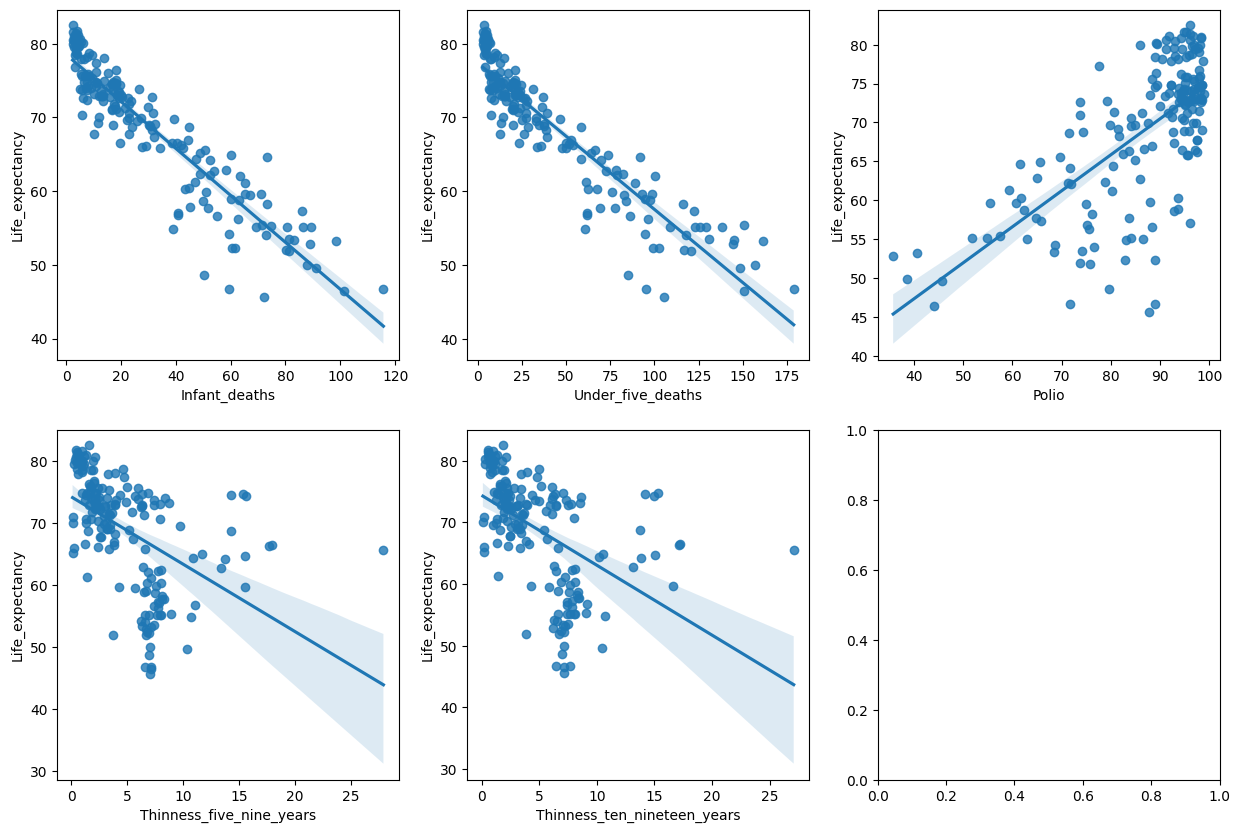

In [5]:
fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2)

columns = val_1st


for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=df, x = col_name, y = 'Life_expectancy', ax = ax_temp)

- 실제로 산점도를 그려보았을때 영유아기 사망률과 소아마비 백신 접종률은 기대수명과 밀접한 연관이 있지만 저체중 요소는 큰 연관성을 보여주지 못함

In [6]:
# 비슷한 변수 합치기
df['Child_deaths'] = df['Infant_deaths'] + df['Under_five_deaths']
df = df.drop(['Infant_deaths', 'Under_five_deaths'], axis=1)
df['Thinness_youth'] = df['Thinness_five_nine_years'] + df['Thinness_ten_nineteen_years']
df = df.drop(['Thinness_five_nine_years', 'Thinness_ten_nineteen_years'], axis=1)

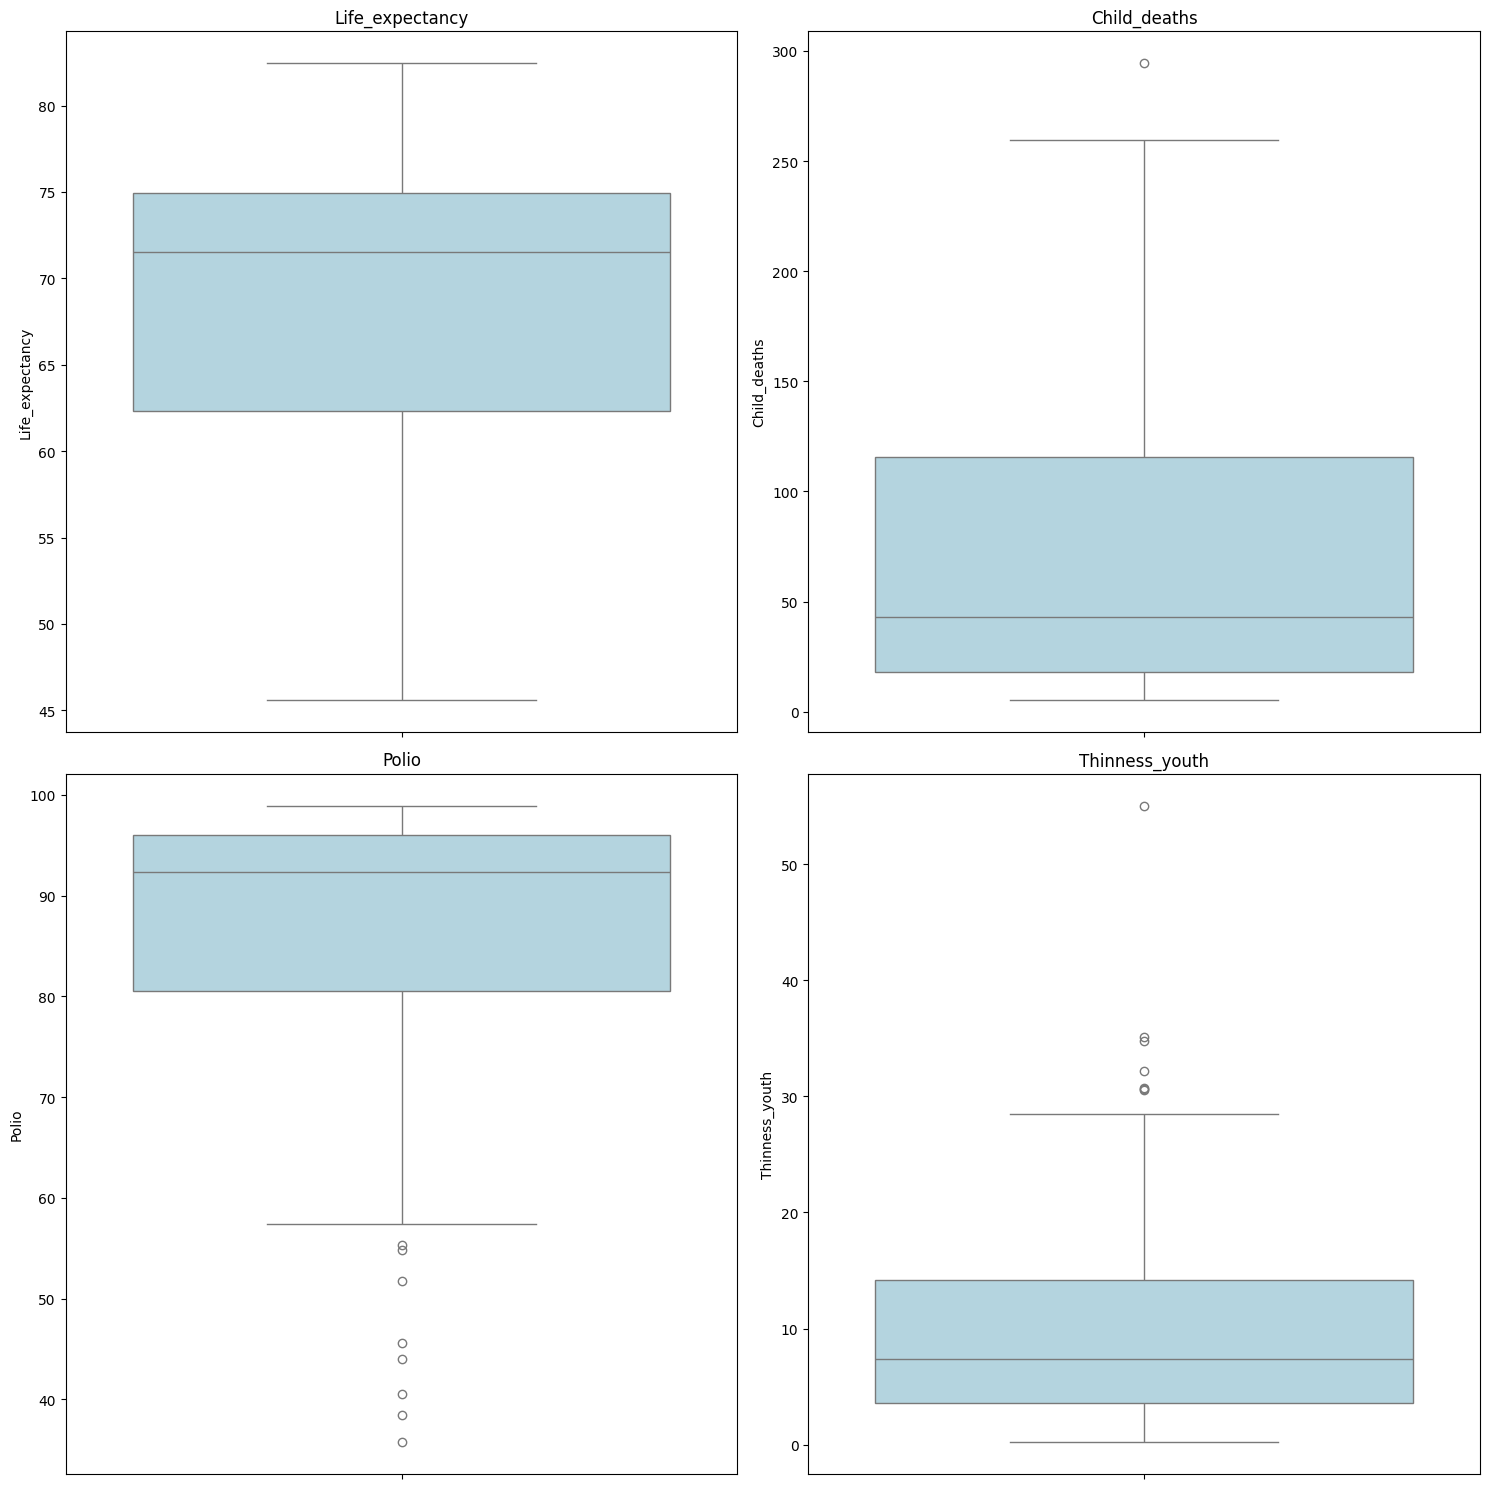

In [7]:
# 박스플롯 그리기
columns = ['Life_expectancy','Child_deaths', 'Polio', 'Thinness_youth']

plt.figure(figsize=(15, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

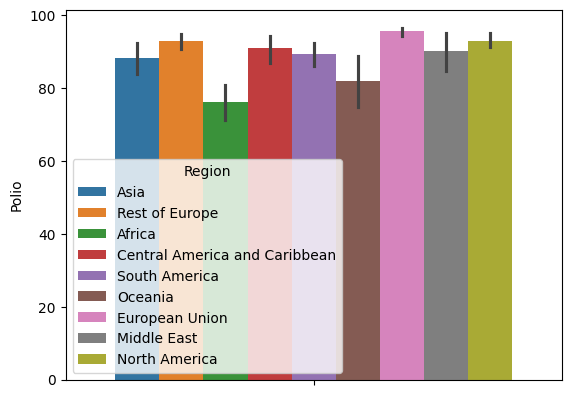

In [8]:
sns.barplot(data=df, y='Polio', hue='Region')
plt.show()

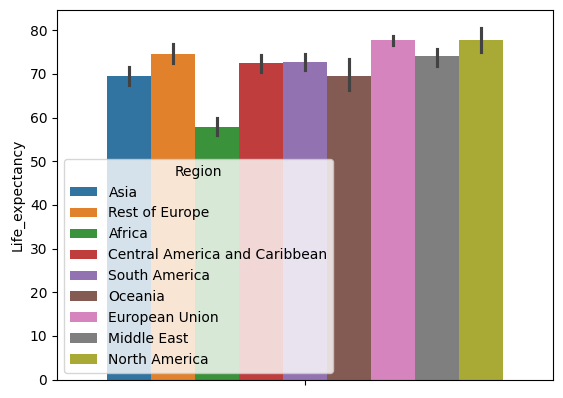

In [9]:
sns.barplot(data=df, y='Life_expectancy', hue='Region')
plt.show()

### 여긴 병합자의 코멘트 아래는 모델학습부분이여서 일단 추가 안했습니다.

## 유진님 eda

### 2번 (건강 관련 변수)

- Diphtheria: 디프테리아 예방접종률
- Incidents_HIV: HIV 발생 건수
- Hepatitis_B: B형 간염 예방접종률
- Measles: 홍역 사례 수

In [10]:
# 1. 데이터 로드

df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

##### 2-1 데이터 컬럼 정리


**1. 부동소수점형 컬럼 (float64)**
- `Year`: 연도
- `Infant_deaths`: 영아 사망 수
- `Under_five_deaths`: 5세 이하 사망 수
- `Adult_mortality`: 성인 사망률
- `Alcohol_consumption`: 1인당 알코올 소비량
- `Hepatitis_B`: B형 간염 예방접종률
- `Measles`: 홍역 사례 수
- `BMI`: 평균 BMI(체질량지수)
- `Polio`: 소아마비 예방접종률
- `Diphtheria`: 디프테리아 예방접종률
- `Incidents_HIV`: HIV 발생 건수
- `GDP_per_capita`: 1인당 GDP
- `Population_mln`: 인구(백만 명 단위)
- `Thinness_ten_nineteen_years`: 10-19세의 저체중 비율
- `Thinness_five_nine_years`: 5-9세의 저체중 비율
- `Schooling`: 평균 교육 연수
- `Life_expectancy`: 기대수명

**2. 객체형 컬럼 (object)**
- `Country`: 국가명
- `Region`: 지역명

##### 3-2 이상치 확인

* 숫자형은 boxplot을 통해 사분위수를 기준으로 이상값을 확인
* 범주형은 value_counts를 통해 카테고리의 빈도를 확인하여 특정 카테고리의 빈도가 비정상적으로 높거나 낮지 않은지 확인

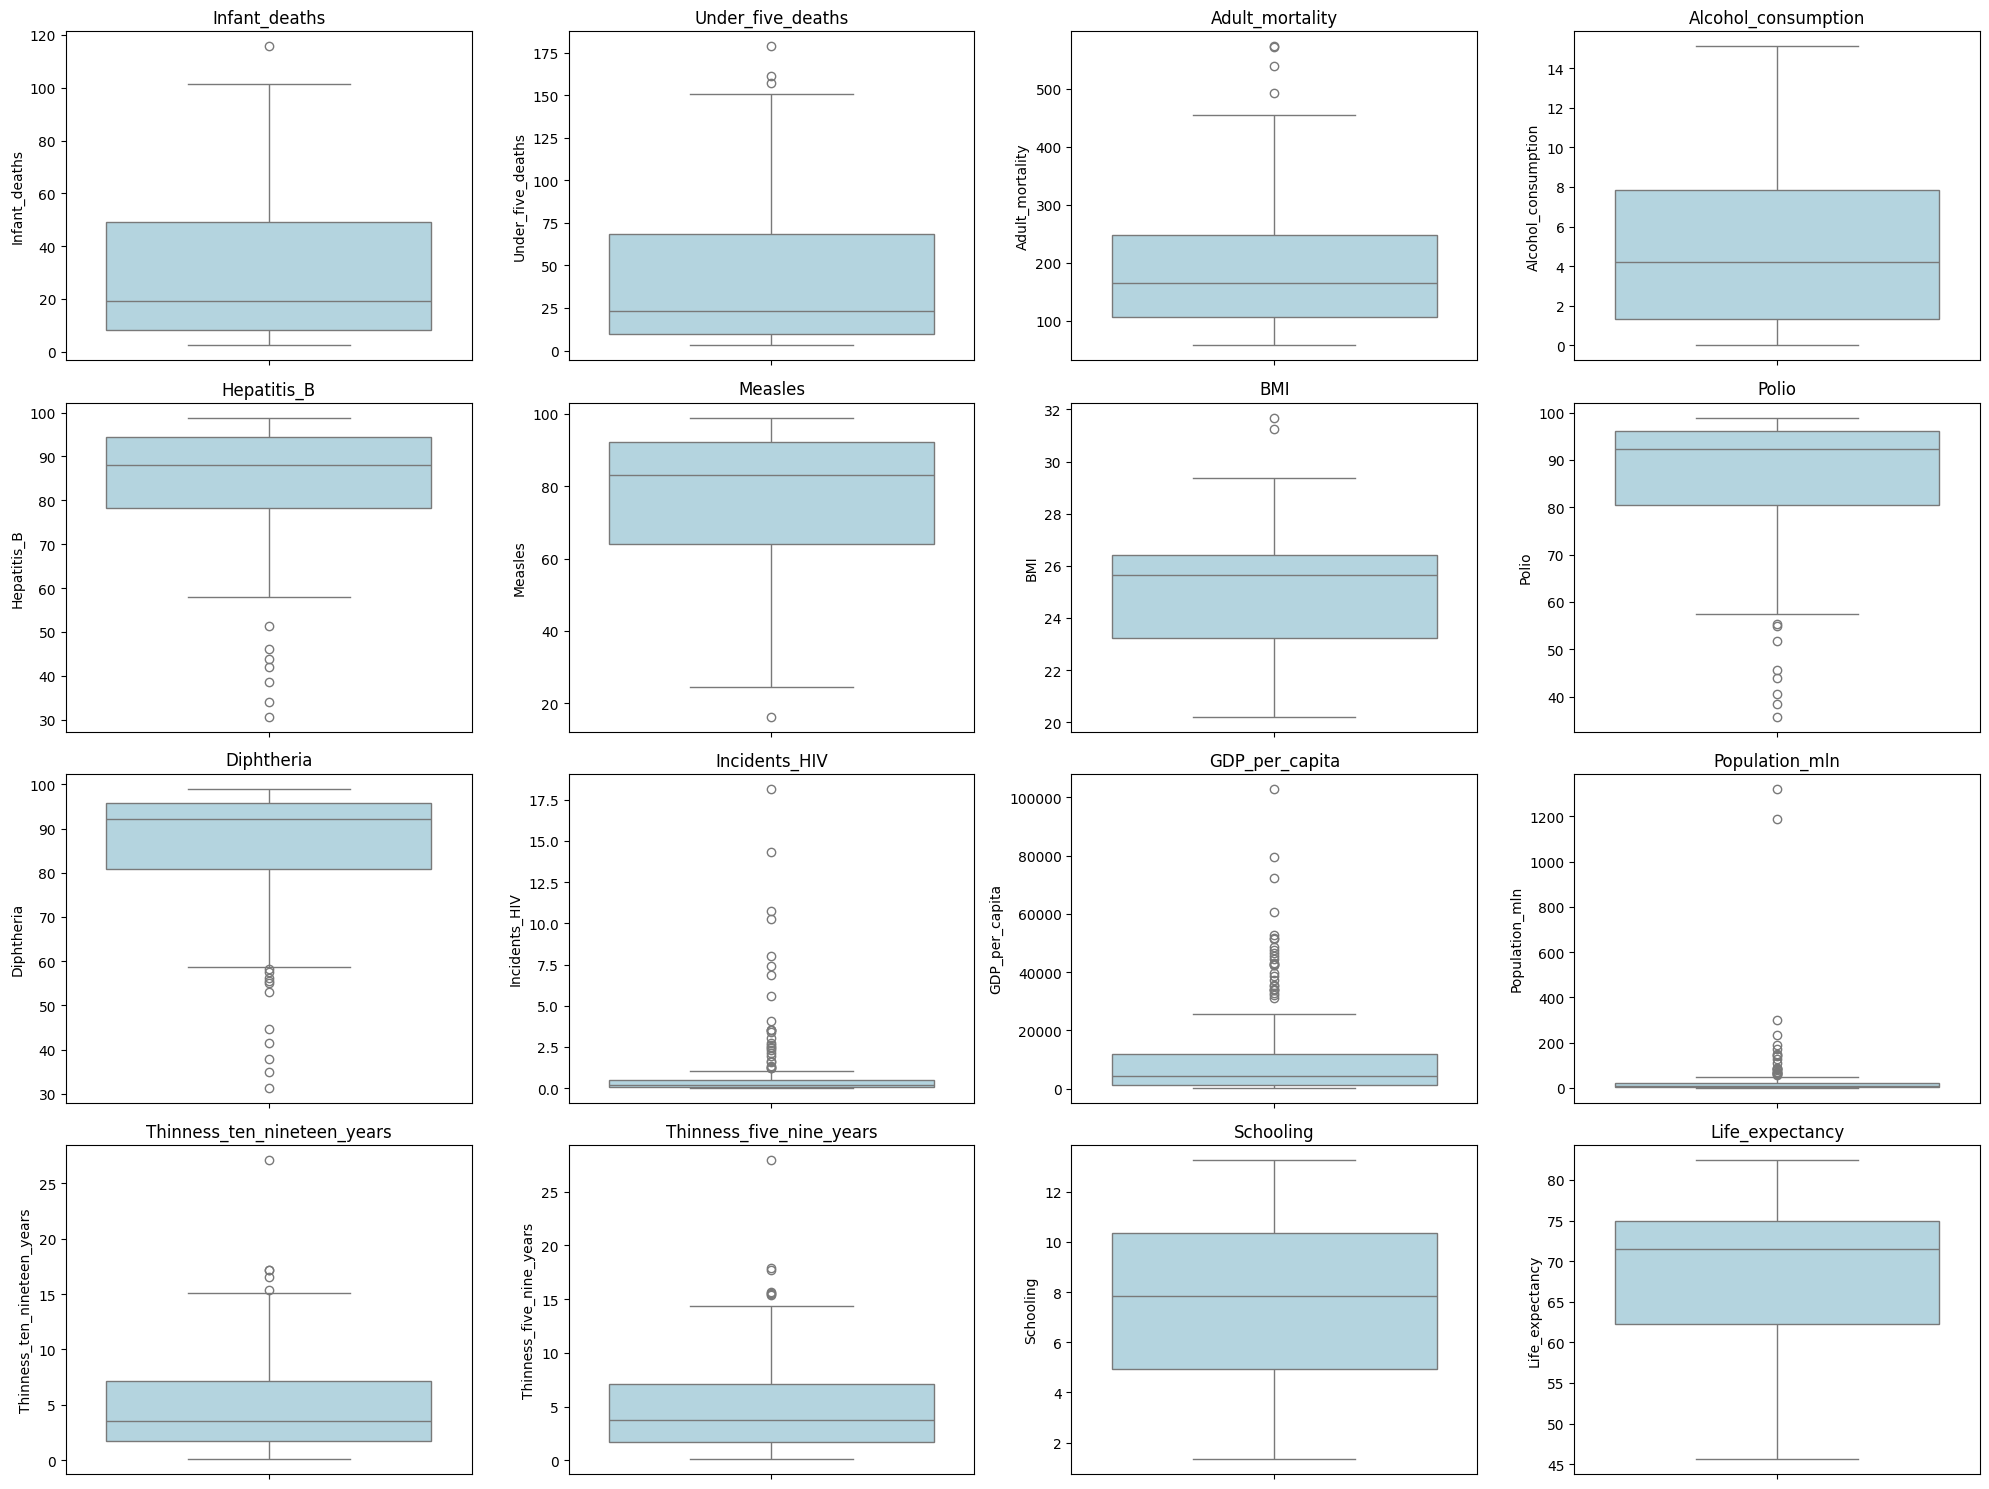

In [11]:
columns = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
    'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 
    'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 
    'Population_mln', 'Thinness_ten_nineteen_years', 
    'Thinness_five_nine_years', 'Schooling', 'Life_expectancy'
]

# 박스플롯 그리기
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

* 수치형 변수의 경우 `Alcohol_consumption`, `Schooling`, `Life_expectancy` 컬럼을 제외하고 모두 사분위수 기준으로 판단했을 때 이상값이 존재한다.
* 하지만 아직 변수별 특성을 모르기 때문에 사분위수만으로 이상치를 판단하여 제거하기에는 무리가 있을 것 이라 판단하였다. 
* 따라서 컬럼별로 분석해보며 이상값에 대해 자세히 들여다 보려고 한다.

In [12]:
columns = ['Country', 'Region', 'Year']


def display_value_counts(columns, dtype):
    for column in columns:
        print(f"Value counts for {column} ({dtype}):\n")
        print(df[column].value_counts())  
        print("-" * 50)

In [13]:
df['Country'].value_counts().unique()

array([1])

* `country`컬럼의 경우 모든 나라가 1개만 들어가 있어야 하는데, 확인 결과 1개씩만 들어가 있어서 이상값이 없다고 판단하였다.
* `Region`은 각 대륙별 나라 갯수를 나타내고 있는데 2007년도 기준 대륙별 국가 수와 일치하기에 이상치가 없다고 판단하였다.
* `year` 컬럼의 경우 2007.5로 고정되어있기 때문에 eda에서 연도에 따른 유의미한 인사이트를 도출할 수는 없다고 판단해서 eda시 제외하였다.

In [14]:
# 이상치 탐지를 위한 IQR 방법 (Life_expectancy 기준)

core_colums = ['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles', 'Life_expectancy']
# - Diphtheria: 디프테리아 예방접종률
# - Incidents_HIV: HIV 발생 건수
# - Hepatitis_B: B형 간염 예방접종률
# - Measles: 홍역 사례 수

for col in core_colums:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 범위 외의 데이터 확인
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {outliers}')

Diphtheria:                       Country                         Region    Year  \
0                 Afghanistan                           Asia  2007.5   
3                      Angola                         Africa  2007.5   
31   Central African Republic                         Africa  2007.5   
32                       Chad                         Africa  2007.5   
51          Equatorial Guinea                         Africa  2007.5   
55                   Ethiopia                         Africa  2007.5   
67                     Guinea                         Africa  2007.5   
70                      Haiti  Central America and Caribbean  2007.5   
118                     Niger                         Africa  2007.5   
119                   Nigeria                         Africa  2007.5   
146                   Somalia                         Africa  2007.5   

     Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0         71.08125           98.61250       

###
* 이상치 밖의 값은 없는 것을 확인함

5. 데이터 시각화를 통한 탐색

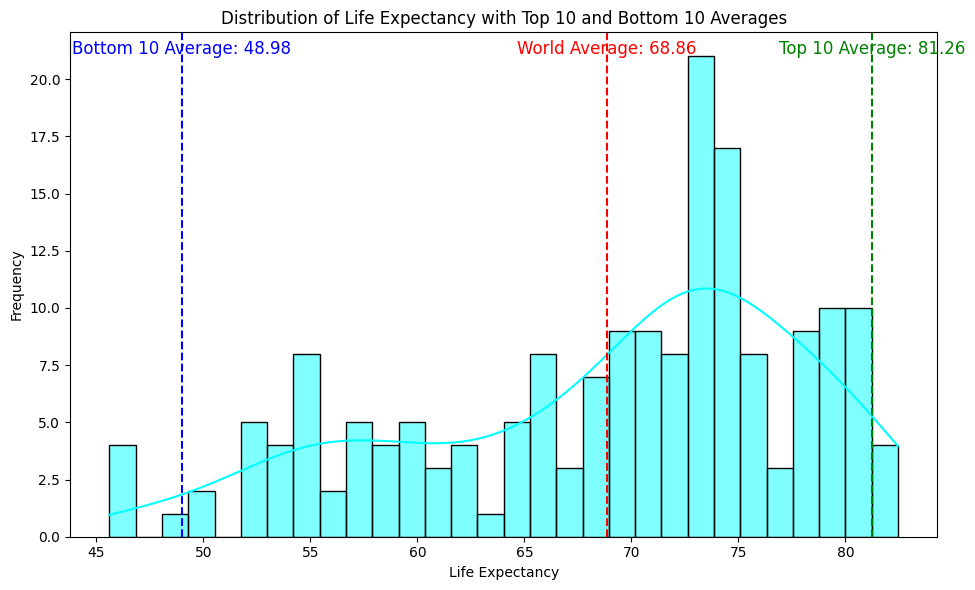

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\3936185702.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_bottom, x='Group', y='Diphtheria', ax=axes[0], palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\3936185702.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_bottom, x='Group', y='Hepatitis_B', ax=axes[1], palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\3936185702.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_bottom, x='Group', y='Measles', ax=a

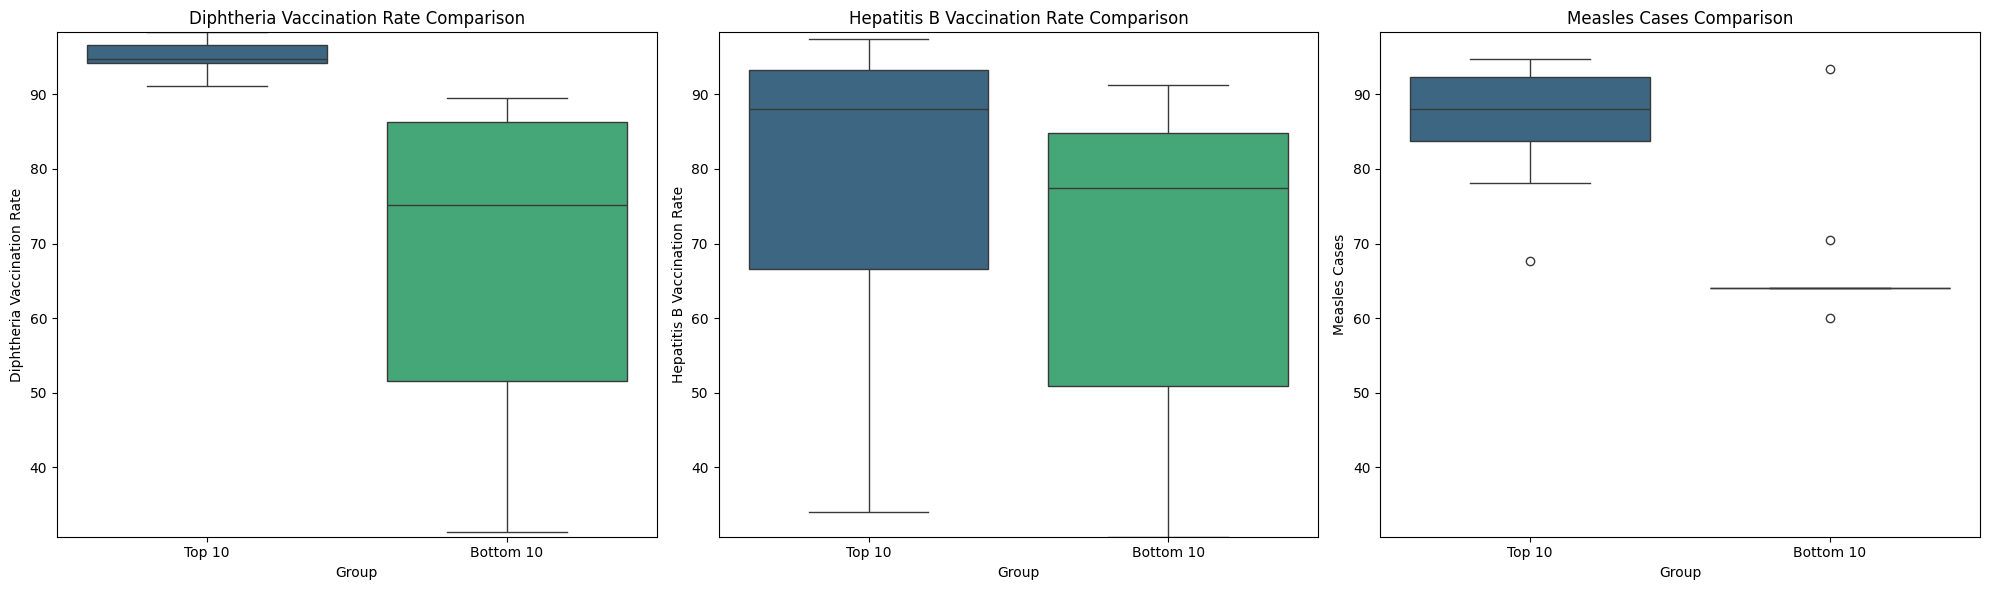

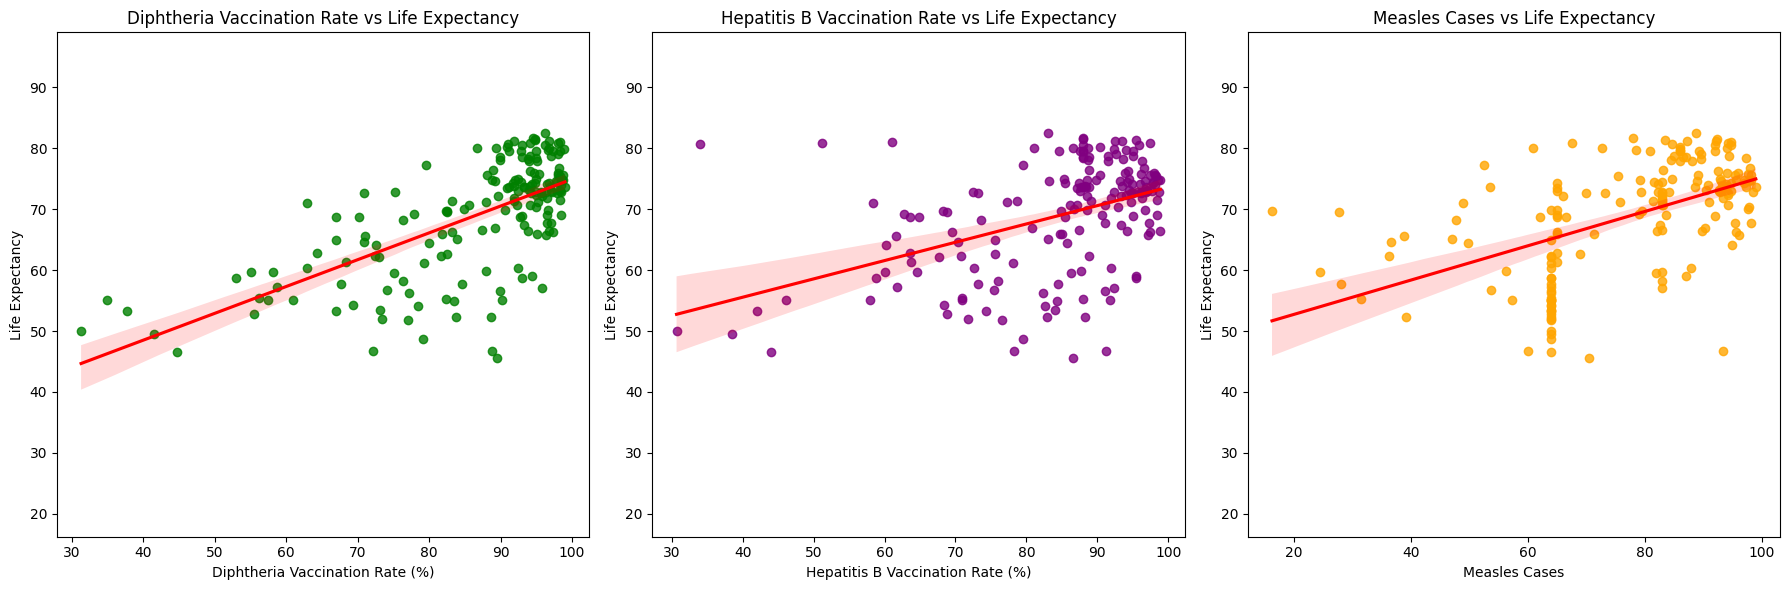

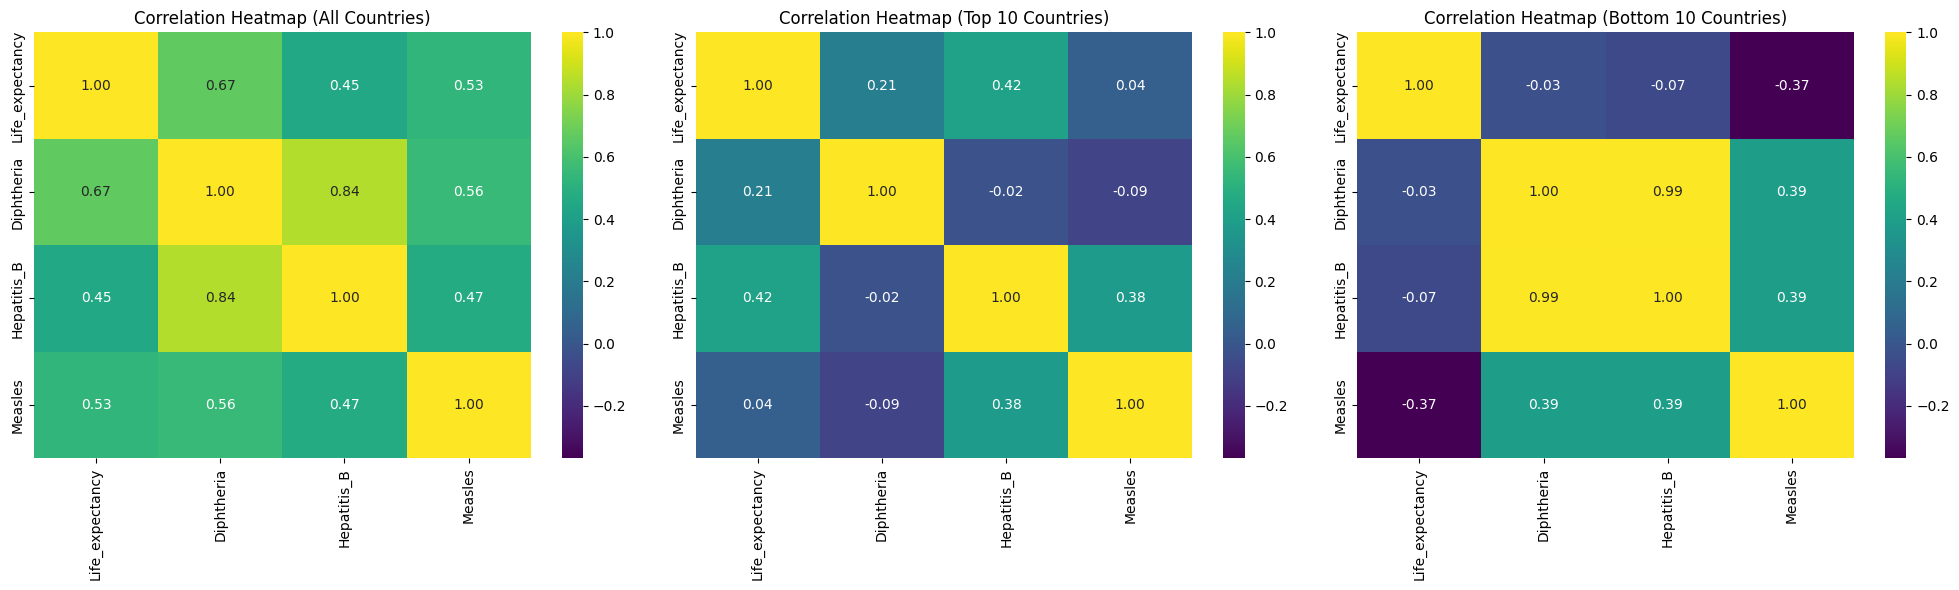

In [15]:
# 데이터 준비 
top_10 = df.nlargest(10, 'Life_expectancy')
bottom_10 = df.nsmallest(10, 'Life_expectancy')

# 1. 국가별 기대수명 분포 (상위 10개, 하위 10개 그룹 평균 표시)
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.histplot(df['Life_expectancy'], kde=True, color='cyan', bins=30)
mean_life_expectancy = df['Life_expectancy'].mean()
mean_top_10 = df.nlargest(10, 'Life_expectancy')['Life_expectancy'].mean()
mean_bottom_10 = df.nsmallest(10, 'Life_expectancy')['Life_expectancy'].mean()

# 평균 수치 라인
line_width = 1.5  # 선 두께 설정
plt.axvline(mean_life_expectancy, color='red', linestyle='--', linewidth=line_width)
plt.axvline(mean_top_10, color='green', linestyle='--', linewidth=line_width)
plt.axvline(mean_bottom_10, color='blue', linestyle='--', linewidth=line_width)

# 그래프의 최대 빈도 값 (높이 설정)
max_y = plt.gca().get_ylim()[1]  # y축 최대값 (빈도수의 최대값)

# 평균 수치 텍스트 추가 (기울기 제거 및 수평 정렬)
plt.text(mean_life_expectancy, max_y * 0.95, f'World Average: {mean_life_expectancy:.2f}', color='red', fontsize=12, ha='center', va='bottom')
plt.text(mean_top_10, max_y * 0.95, f'Top 10 Average: {mean_top_10:.2f}', color='green', fontsize=12, ha='center', va='bottom')
plt.text(mean_bottom_10, max_y * 0.95, f'Bottom 10 Average: {mean_bottom_10:.2f}', color='blue', fontsize=12, ha='center', va='bottom')

# 그래프 제목 및 라벨
plt.title("Distribution of Life Expectancy with Top 10 and Bottom 10 Averages")
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# 그래프 간격 조정
plt.subplots_adjust(right=0.80)  # 오른쪽 여백을 충분히 주어 레이아웃이 벗어나지 않도록 설정
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()

# 2. 상위/하위 기대수명 그룹 비교 및 건강 요소 분석 (상위 10개 vs 하위 10개 그룹)
top_10 = df.nlargest(10, 'Life_expectancy')
bottom_10 = df.nsmallest(10, 'Life_expectancy')

# 상위 10개 vs 하위 10개 국가를 하나의 데이터프레임으로 결합
top_bottom = pd.concat([top_10, bottom_10])
top_bottom['Group'] = ['Top 10'] * len(top_10) + ['Bottom 10'] * len(bottom_10)

# 건강 요소별 비교 (디프테리아, B형 간염 예방접종률, 홍역 사례)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 높이를 줄임

# Y축 범위 설정을 위해 각각의 y축 최소/최대 값 계산
y_min = min(top_bottom['Diphtheria'].min(), top_bottom['Hepatitis_B'].min(), top_bottom['Measles'].min())
y_max = max(top_bottom['Diphtheria'].max(), top_bottom['Hepatitis_B'].max(), top_bottom['Measles'].max())

sns.boxplot(data=top_bottom, x='Group', y='Diphtheria', ax=axes[0], palette='viridis')
axes[0].set_title('Diphtheria Vaccination Rate Comparison')
axes[0].set_ylabel('Diphtheria Vaccination Rate')
axes[0].set_ylim([y_min, y_max])  # Y축 범위 통일

sns.boxplot(data=top_bottom, x='Group', y='Hepatitis_B', ax=axes[1], palette='viridis')
axes[1].set_title('Hepatitis B Vaccination Rate Comparison')
axes[1].set_ylabel('Hepatitis B Vaccination Rate')
axes[1].set_ylim([y_min, y_max])  # Y축 범위 통일

sns.boxplot(data=top_bottom, x='Group', y='Measles', ax=axes[2], palette='viridis')
axes[2].set_title('Measles Cases Comparison')
axes[2].set_ylabel('Measles Cases')
axes[2].set_ylim([y_min, y_max])  # Y축 범위 통일

# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3)  # 그래프 간의 간격을 충분히 두기
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()

# 3. B형 간염, 디프테리아, 홍역과 기대수명 간의 관계 (산점도 + 회귀선)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 높이를 줄임

# Y축 범위 설정을 위해 각각의 y축 최소/최대 값 계산
y_min = min(df['Diphtheria'].min(), df['Hepatitis_B'].min(), df['Measles'].min())
y_max = max(df['Diphtheria'].max(), df['Hepatitis_B'].max(), df['Measles'].max())

# 3.1 디프테리아 예방접종률과 기대수명 간의 관계
sns.regplot(data=df, x='Diphtheria', y='Life_expectancy', scatter_kws={'color': 'green'}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title("Diphtheria Vaccination Rate vs Life Expectancy")
axes[0].set_xlabel('Diphtheria Vaccination Rate (%)')
axes[0].set_ylabel('Life Expectancy')
axes[0].set_ylim([y_min, y_max])  # Y축 범위 통일

# 3.2 B형 간염 예방접종률과 기대수명 간의 관계
sns.regplot(data=df, x='Hepatitis_B', y='Life_expectancy', scatter_kws={'color': 'purple'}, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title("Hepatitis B Vaccination Rate vs Life Expectancy")
axes[1].set_xlabel('Hepatitis B Vaccination Rate (%)')
axes[1].set_ylabel('Life Expectancy')
axes[1].set_ylim([y_min, y_max])  # Y축 범위 통일

# 3.3 홍역 사례 수와 기대수명 간의 관계
sns.regplot(data=df, x='Measles', y='Life_expectancy', scatter_kws={'color': 'orange'}, line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title("Measles Cases vs Life Expectancy")
axes[2].set_xlabel('Measles Cases')
axes[2].set_ylabel('Life Expectancy')
axes[2].set_ylim([y_min, y_max])  # Y축 범위 통일

# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3)  # 그래프 간의 간격을 충분히 두기
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()

# 4. 전체 국가, 상위 10개, 하위 10개 그룹에 대한 heatmap
# 전체 데이터와 상위/하위 10개 그룹의 데이터를 결합하여 상관 행렬을 계산
df_all = df[['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Measles']].corr()
top_10_corr = top_10[['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Measles']].corr()
bottom_10_corr = bottom_10[['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Measles']].corr()

# 히트맵의 전체 값 범위 계산
vmin = min(df_all.min().min(), top_10_corr.min().min(), bottom_10_corr.min().min())
vmax = max(df_all.max().max(), top_10_corr.max().max(), bottom_10_corr.max().max())

# Heatmap 그리기
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 높이를 줄임

sns.heatmap(df_all, annot=True, cmap='viridis', fmt='.2f', ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title("Correlation Heatmap (All Countries)")

sns.heatmap(top_10_corr, annot=True, cmap='viridis', fmt='.2f', ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title("Correlation Heatmap (Top 10 Countries)")

sns.heatmap(bottom_10_corr, annot=True, cmap='viridis', fmt='.2f', ax=axes[2], vmin=vmin, vmax=vmax)
axes[2].set_title("Correlation Heatmap (Bottom 10 Countries)")

# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3)  # 그래프 간의 간격을 충분히 두기
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()


## 다인님 eda

### 0. 데이터 불러오기

In [16]:
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

**분석할 컬럼**

* 경제적 사회적 요인 관련 변수

    - `Country`: 국가명
    - `Region`: 지역명
    - `GDP_per_capita`: 1인당 GDP
    - `Population_mln`: 인구(백만 명 단위)

### 1. 국가별/지역별 기대수명

In [17]:
df = df.sort_values('Life_expectancy')

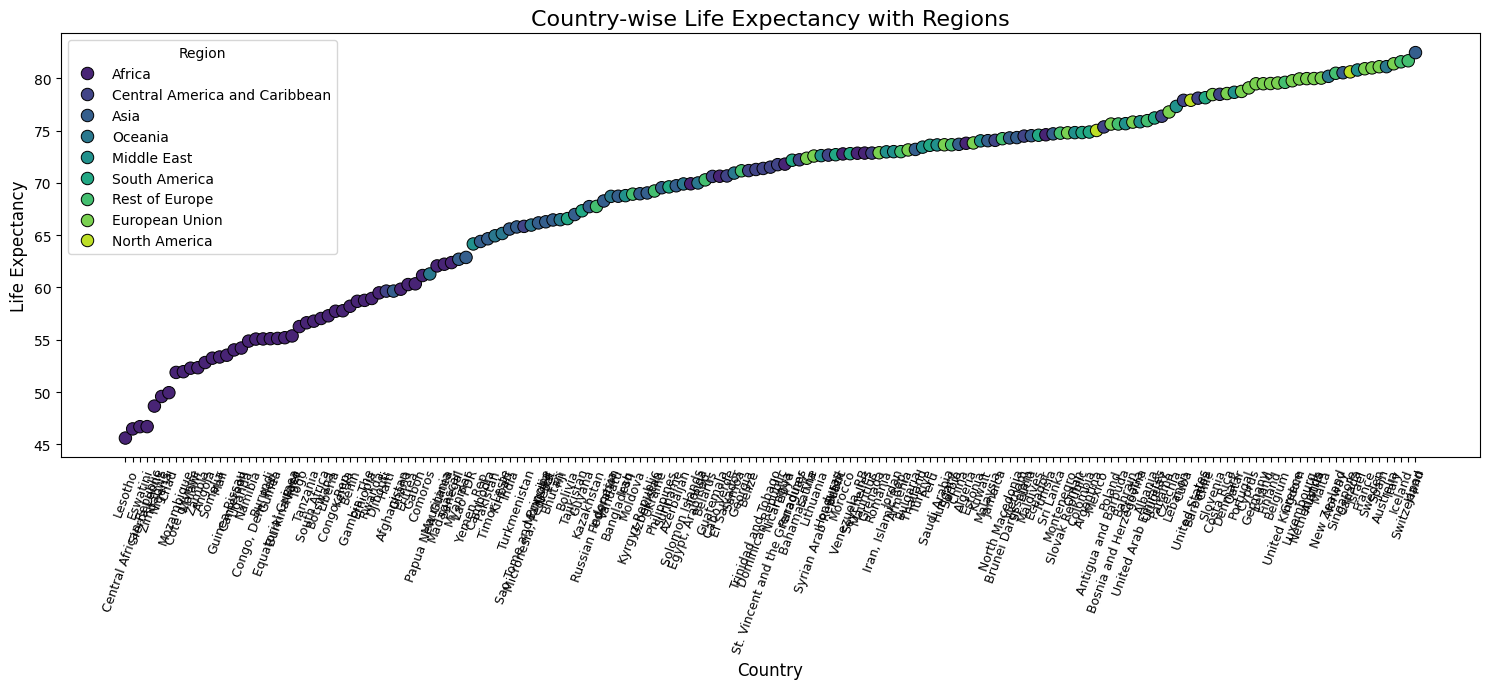

In [18]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df,
    x='Country',
    y='Life_expectancy',
    hue='Region',
    palette='viridis',
    s=80, 
    edgecolor='black'
)

plt.xticks(rotation=70, fontsize=9)
plt.title('Country-wise Life Expectancy with Regions', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()

plt.tight_layout()
plt.show()

In [19]:
world = gpd.read_file("./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [20]:
name_changes = {
    'United Republic of Tanzania': 'Tanzania',
    'Western Sahara': 'Sahrawi Arab Democratic Republic',
    'United States of America': 'United States',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Sudan': 'Sudan',
    'Russia': 'Russian Federation',
    'The Bahamas': 'Bahamas, The',
    'Falkland Islands': 'Falkland Islands (Malvinas)',
    'Greenland': 'Greenland',
    'French Southern and Antarctic Lands': 'French Southern and Antarctic Lands',
    'East Timor': 'Timor-Leste',
    'Venezuela': 'Venezuela, RB',
    'Puerto Rico': 'Puerto Rico',
    'Ivory Coast': "Cote d'Ivoire",
    'Republic of the Congo': 'Congo, Rep.',
    'eSwatini': 'Eswatini',
    'Palestine': 'Palestine',
    'Gambia': 'Gambia, The',
    'Laos': 'Lao PDR',
    'North Korea': 'Korea, Dem. People\'s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Iran': 'Iran, Islamic Rep.',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'New Caledonia': 'New Caledonia',
    'Taiwan': 'Taiwan (Province of China)',
    'Brunei': 'Brunei Darussalam',
    'Slovakia': 'Slovak Republic',
    'Yemen': 'Yemen, Rep.',
    'Antarctica': 'Antarctica',
    'Northern Cyprus': 'Northern Cyprus',
    'Egypt': 'Egypt, Arab Rep.',
    'Somaliland': 'Somaliland',
    'Republic of Serbia': 'Serbia',
    'Kosovo': 'Kosovo',
    'South Sudan': 'South Sudan'
}

# ADMIN 열의 값을 변경
world['ADMIN'] = world['ADMIN'].replace(name_changes)

In [21]:
merged = world.merge(df, left_on="ADMIN", right_on="Country", how="left")

m = folium.Map(location=[30, 0], zoom_start=0.5, tiles="CartoDB positron")

# 기대수명을 Choropleth로 추가
folium.Choropleth(
    geo_data=merged.__geo_interface__,  # GeoJSON 포맷 사용
    data=merged,                      # 데이터프레임
    columns=['ADMIN', 'Life_expectancy'],  # 국가와 기대수명 컬럼
    key_on='feature.properties.ADMIN',  # 'ADMIN' 속성으로 연결
    fill_color='viridis',  # 색상 그라데이션
    fill_opacity=0.8,
    line_opacity=0.4,
    legend_name='Life Expectancy (Years)'
).add_to(m)

m

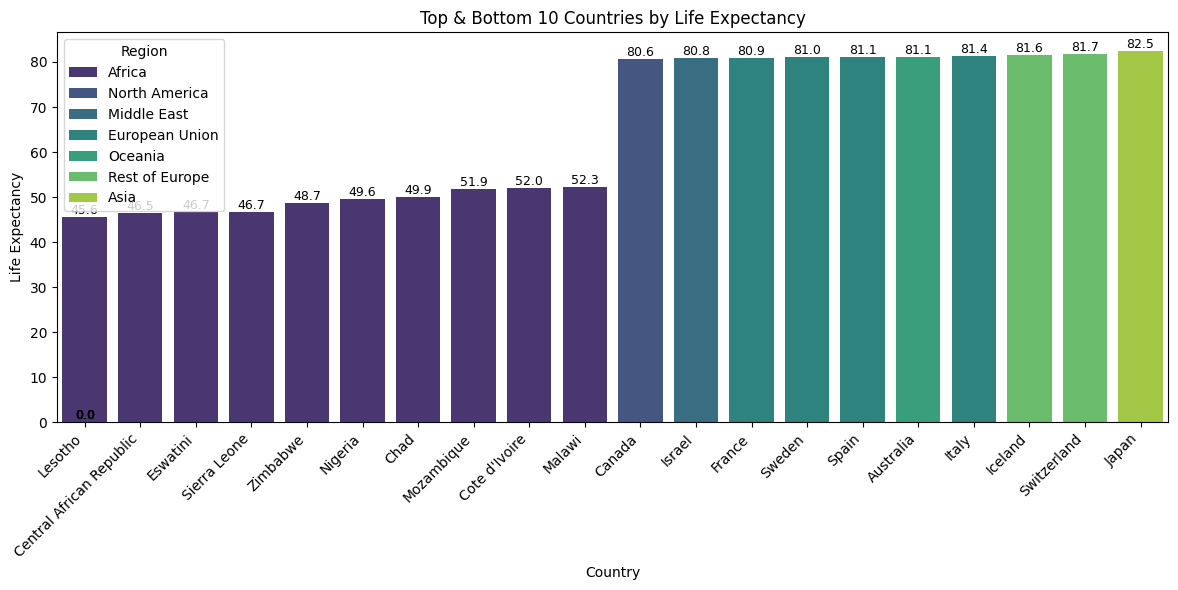

In [22]:

df_top_bottom = pd.concat([df.head(10), df.tail(10)])


plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top_bottom,
    x='Country',
    y='Life_expectancy',
    hue='Region',
    palette='viridis'
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{bar.get_height():.1f}',  
        ha='center',  
        va='bottom',  
        fontsize=9,  
        color='black'  
    )


plt.xticks(rotation=45, ha='right')
plt.title('Top & Bottom 10 Countries by Life Expectancy')
plt.ylabel('Life Expectancy')
plt.xlabel('Country')

plt.tight_layout()
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\2657242675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


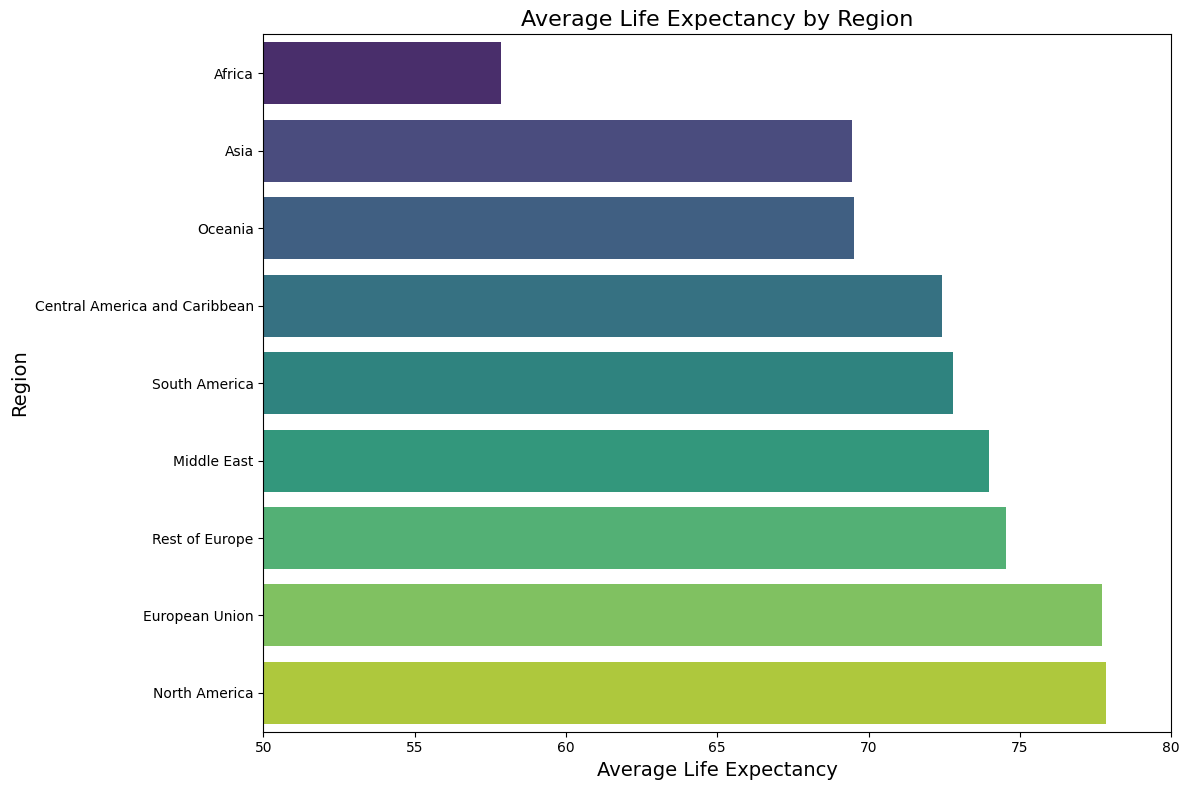

In [23]:
region_mean = df.groupby('Region')['Life_expectancy'].mean()
region_mean = region_mean.sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")

# 그래프 제목과 레이블
plt.title('Average Life Expectancy by Region', fontsize=16)
plt.xlabel('Average Life Expectancy', fontsize=14)
plt.ylabel('Region', fontsize=14)

plt.xlim(50, 80)
# 그래프 표시
plt.tight_layout()
plt.show()

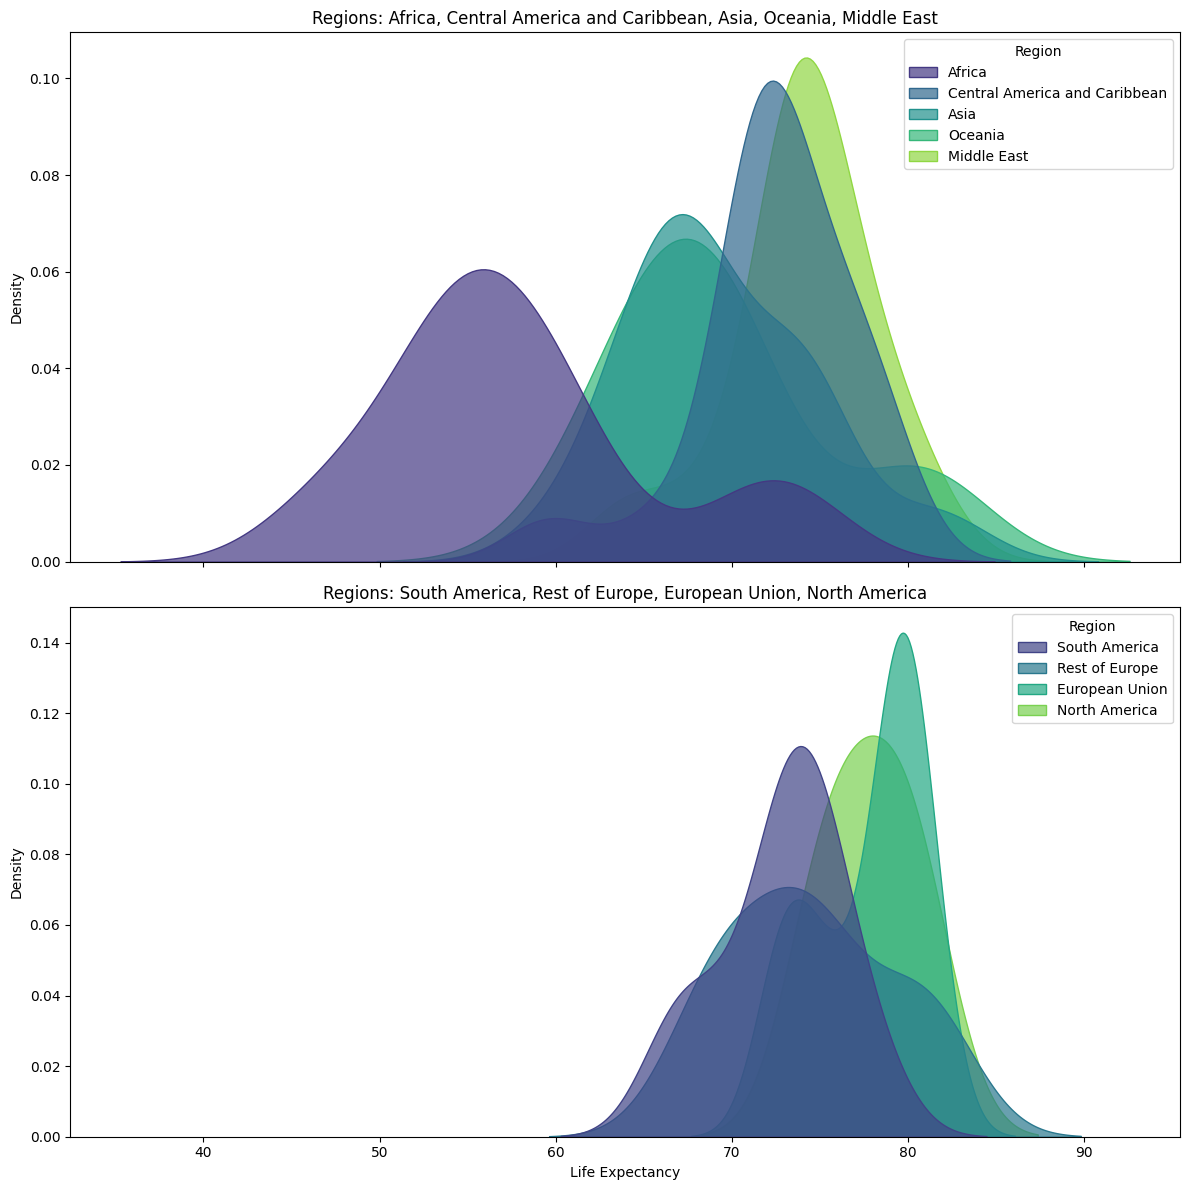

In [24]:
regions = df["Region"].unique()
n_regions = len(regions)


regions_per_subplot = 5
n_rows = int(np.ceil(n_regions / regions_per_subplot))


fig, axes = plt.subplots(n_rows, 1, figsize=(12, 6 * n_rows), sharex=True)


for i, ax in enumerate(axes):
    start_idx = i * regions_per_subplot
    end_idx = start_idx + regions_per_subplot
    selected_regions = regions[start_idx:end_idx]


    subset = df[df["Region"].isin(selected_regions)]
    
    sns.kdeplot(
        data=subset,
        x="Life_expectancy",
        hue="Region",
        fill=True,
        palette="viridis",
        alpha=0.7,
        common_norm=False,
        ax=ax,
    )
    
    ax.set_title(f"Regions: {', '.join(selected_regions)}", fontsize=12)
    ax.set_xlabel("Life Expectancy", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

Africa:

분포가 왼쪽으로 치우쳐 있으며, 가장 낮은 기대수명을 보인다.
주요 봉우리는 약 50~55세에 위치하며, 이는 전반적으로 낮은 평균 기대수명을 암시한다.
분포가 넓게 퍼져 있어 국가 간 기대수명의 격차가 큼을 알 수 있다.

Central America and Caribbean:

봉우리는 약 70세 근처에 위치하며, 기대수명이 중간 정도 수준이다.
분포가 상대적으로 좁아, 해당 지역의 국가들이 기대수명에서 비슷한 경향을 보임을 나타낸다.

Asia:

봉우리가 약 70~75세 근처에 있으며, 분포가 오른쪽으로 길게 늘어져 있어 기대수명이 더 높은 국가도 포함되어 있음을 보여준다.
아시아 지역은 경제적/사회적 격차로 인해 넓은 범위를 가질 가능성이 크다.

Oceania:

기대수명이 80세 근처에 집중되어 있으며, 높은 수준을 유지하고 있다.
분포가 매우 좁아, 이 지역의 국가들이 유사한 기대수명을 가진다는 것을 암시한다.

Middle East:

봉우리가 약 70세 근처에 위치하며, 비교적 중앙에 분포한다.
다른 지역에 비해 분포의 폭이 좁고 균일해 보인다.


South America:

봉우리는 약 70~75세 근처에 있으며, 중상위 기대수명을 보인다.
분포는 비교적 좁아, 국가 간 기대수명의 차이가 크지 않음을 나타낸다.

Rest of Europe:

봉우리는 75~80세 사이에 있으며, 전반적으로 높은 기대수명을 나타낸다.
분포가 매우 좁고 밀도가 높아, 유럽 대부분의 국가가 높은 기대수명을 공유하고 있음을 알 수 있다.

North America:

봉우리가 80세 근처에 있으며, 가장 높은 기대수명을 보이는 그룹 중 하나입니다.
분포가 좁아 국가 간 격차가 적다.

3. 전반적인 특징 및 비교

**아프리카(Africa)** 지역은 가장 낮은 기대수명을 보이며, 국가 간 편차가 큰 편이다.

**오세아니아(Oceania)**, **유럽(Rest of Europe)**, 북아메리카(North America)는 높은 기대수명을 공유하며, 분포가 좁고 국가 간 편차가 작다.

**중남미 및 아시아 지역**은 중간 수준의 기대수명을 보이지만, 일부 국가는 더 높은 기대수명을 가지며 분포가 넓게 퍼져 있다.

### 2. GDP와 인구수 이상치 분석

* GDP_per_capita와 Population_mln이 지역별로 상이할 수 있기 때문에, 지역별로 이상치를 판단해보려 한다.

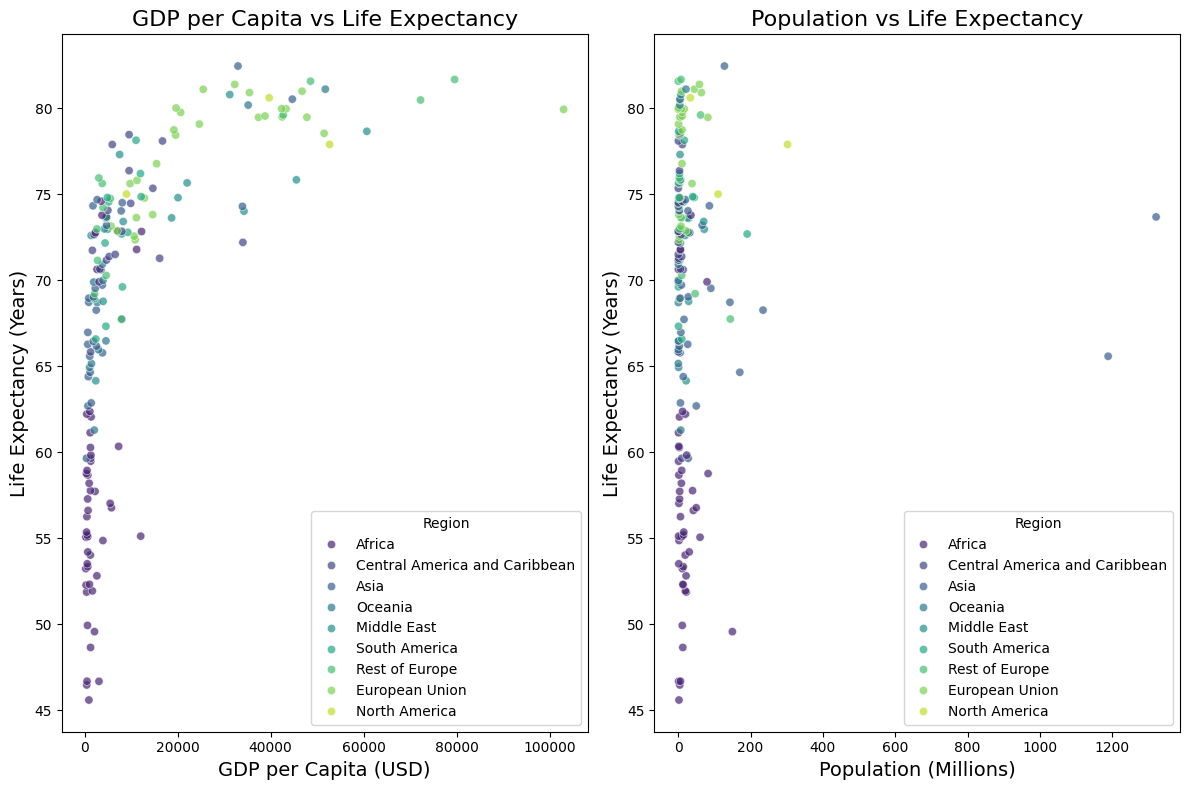

In [25]:
# GDP per Capita와 Life Expectancy 산점도
plt.figure(figsize=(12, 8))

# GDP와 Life Expectancy 산점도
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='GDP_per_capita', y='Life_expectancy', hue='Region', palette='viridis', alpha=0.7)
plt.title('GDP per Capita vs Life Expectancy', fontsize=16)
plt.xlabel('GDP per Capita (USD)', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)

# Population과 Life Expectancy 산점도
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Population_mln', y='Life_expectancy', hue='Region', palette='viridis', alpha=0.7)
plt.title('Population vs Life Expectancy', fontsize=16)
plt.xlabel('Population (Millions)', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)

plt.tight_layout()
plt.show()

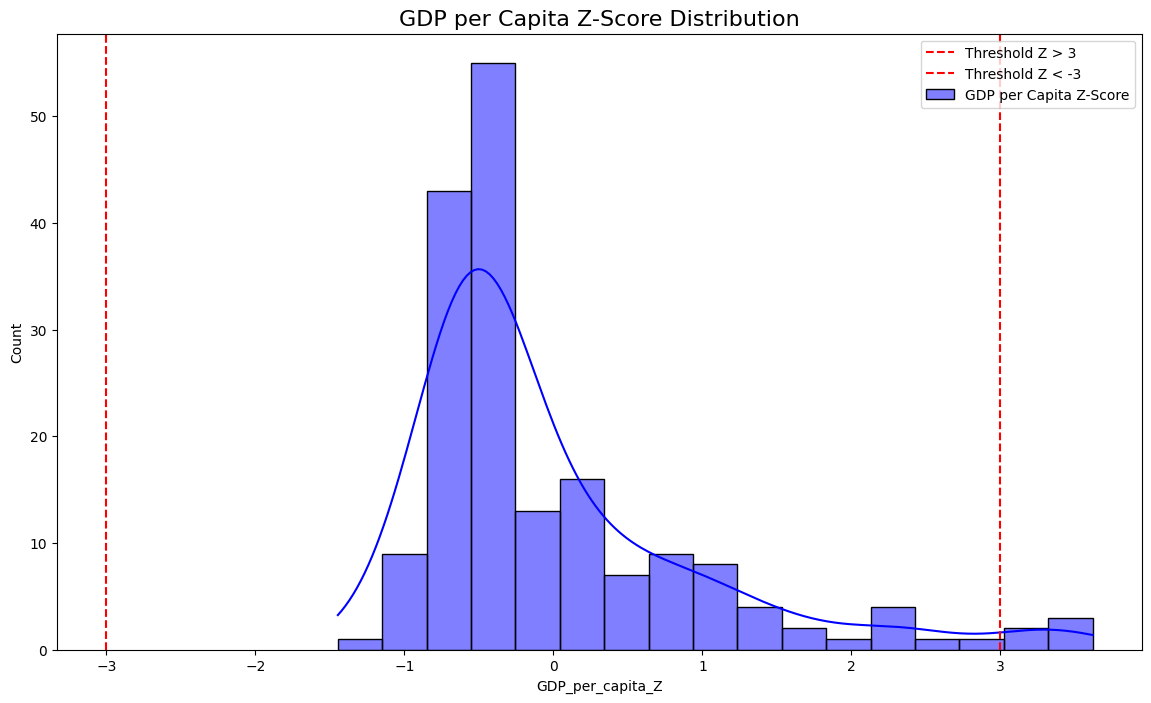

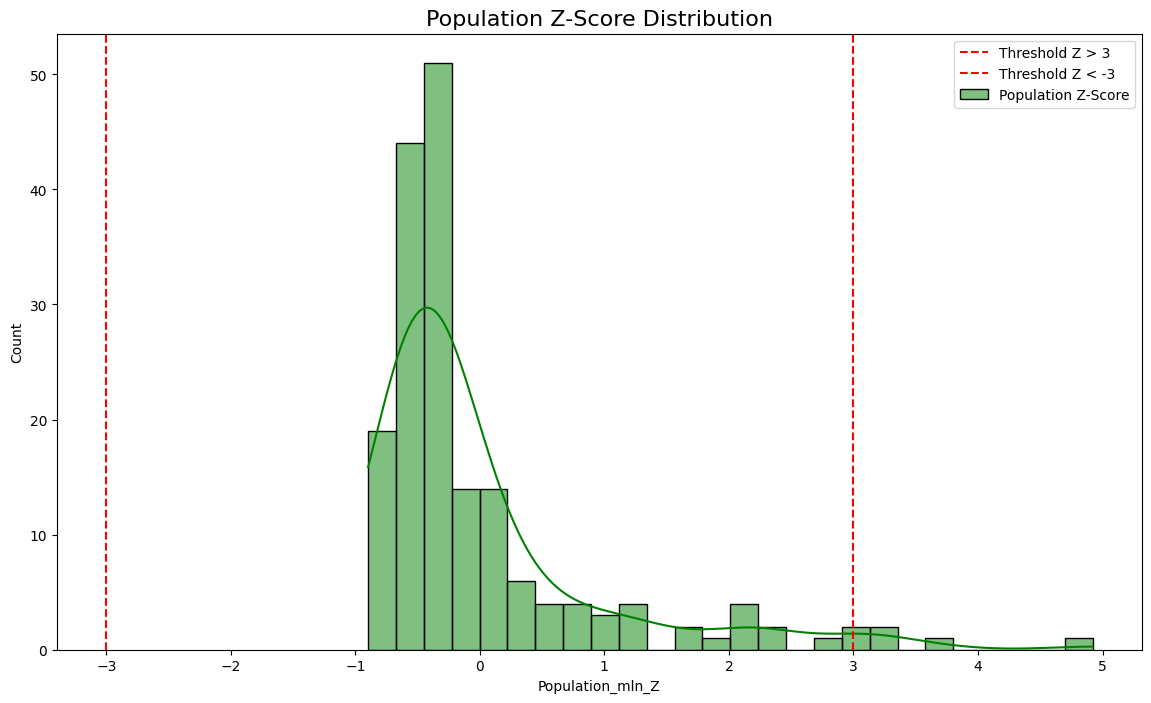

In [26]:

# 지역별 Z-score 계산
region_stats = df.groupby('Region')[['GDP_per_capita', 'Population_mln']].agg(['mean', 'std'])
df['GDP_per_capita_Z'] = df.apply(lambda row: (row['GDP_per_capita'] - region_stats.loc[row['Region'], ('GDP_per_capita', 'mean')]) / region_stats.loc[row['Region'], ('GDP_per_capita', 'std')], axis=1)
df['Population_mln_Z'] = df.apply(lambda row: (row['Population_mln'] - region_stats.loc[row['Region'], ('Population_mln', 'mean')]) / region_stats.loc[row['Region'], ('Population_mln', 'std')], axis=1)

# Z-score가 3보다 큰 값은 이상치로 간주
outliers_GDP_region = df[df['GDP_per_capita_Z'].abs() > 3]
outliers_population_region = df[df['Population_mln_Z'].abs() > 3]

# GDP per Capita Z-Score 히스토그램
plt.figure(figsize=(14, 8))
sns.histplot(df['GDP_per_capita_Z'], kde=True, color='blue', label="GDP per Capita Z-Score")
plt.axvline(3, color='red', linestyle='--', label='Threshold Z > 3')
plt.axvline(-3, color='red', linestyle='--', label='Threshold Z < -3')
plt.title('GDP per Capita Z-Score Distribution', fontsize=16)
plt.legend()
plt.show()

# Population by Region Z-Score 히스토그램
plt.figure(figsize=(14, 8))
sns.histplot(df['Population_mln_Z'], kde=True, color='green', label="Population Z-Score")
plt.axvline(3, color='red', linestyle='--', label='Threshold Z > 3')
plt.axvline(-3, color='red', linestyle='--', label='Threshold Z < -3')
plt.title('Population Z-Score Distribution', fontsize=16)
plt.legend()
plt.show()

In [27]:
# GDP per Capita Z-score가 3을 초과하는 이상치 추출
outliers_GDP_region = df[df['GDP_per_capita_Z'].abs() > 3]

# Population Z-score가 3을 초과하는 이상치 추출
outliers_population_region = df[df['Population_mln_Z'].abs() > 3]

# 결과 출력 (GDP per Capita 이상치와 Population 이상치)
print("GDP per Capita Z-score Outliers:")
display(outliers_GDP_region[['Region', 'Country', 'GDP_per_capita_Z']])

print("\nPopulation Z-score Outliers:")
display(outliers_population_region[['Region', 'Country', 'Population_mln_Z']])

GDP per Capita Z-score Outliers:


Region            Country  GDP_per_capita_Z
51                          Africa  Equatorial Guinea          3.308435
94                          Africa              Libya          3.011919
10   Central America and Caribbean       Bahamas, The          3.263916
140                         Africa         Seychelles          3.368514
96                  European Union         Luxembourg          3.617869
142                           Asia          Singapore          3.341175


Population Z-score Outliers:


Region             Country  Population_mln_Z
119          Africa             Nigeria          4.920200
74             Asia               India          3.204249
133  Rest of Europe  Russian Federation          3.201684
22    South America              Brazil          3.046067
34             Asia               China          3.608051
62   European Union             Germany          3.029649

1. 경제적 특성과 산업 구조 차이
**Equatorial Guinea (GDP per Capita)**와 같은 자원이 풍부한 나라는, 예를 들어 석유나 천연 자원이 경제에서 큰 비중을 차지하는 경우, 다른 나라들보다 매우 높은 GDP per Capita를 기록할 수 있습니다.
Luxembourg와 같은 금융 중심지나 싱가포르 같은 무역 중심 국가들은 자본이 집중되고 경제 규모가 상대적으로 작지만 매우 높은 1인당 GDP를 기록할 수 있습니다.
이러한 나라들은 지역 내 경제 규모나 산업 구조와 다르게 높은 GDP를 기록할 수 있기 때문에 이상치로 간주되지 않아야 할 가능성이 있습니다.
2. 인구 분포와 국가 크기의 차이
India와 China 같은 거대 인구 국가는, 세계 경제와 인구 규모에서 중요한 위치를 차지하고 있으며, 이들의 인구 수는 매우 많기 때문에 상대적으로 큰 인구 수를 기록하게 됩니다.
예를 들어, Nigeria나 Brazil도 거대 국가로서 인구 수가 많은 특성을 가진 나라들이기 때문에, 이들이 상대적으로 높은 인구 수 Z-score를 기록하는 것은 예외적인 일이 아닐 수 있습니다.
3. 지리적, 경제적 특성에 따른 차이
Seychelles나 Bahamas와 같은 국가들은 소규모 섬나라로서 자원의 분포나 경제 규모가 다른 국가들과 차별화된 특성을 가질 수 있습니다. 이러한 특성은 경제적 분포가 불균형하게 나타날 수 있어 높은 GDP per Capita가 자연스러운 결과일 수 있습니다.

사전 지식을 바탕으로 값들이 그 지역의 특성상 자연스럽다고 판단되어 분포상 Z-score의 3을 넘는 값을 이상치로 판단하여 제거하지 않고 eda를 진행하였다.

### 3. GDP/인구수 차이별 기대수명 분석

In [28]:
# 지도 중심 설정
m = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB positron")

# 기대수명과 GDP per Capita를 사용하여 지도에 Choropleth 추가
folium.Choropleth(
    geo_data=world.__geo_interface__,  # 세계 지도 GeoJSON
    data=df,  # 데이터프레임
    columns=['Country', 'Life_expectancy'],  # 국가와 기대수명
    key_on='feature.properties.ADMIN',  # 국가명에 기반한 연결
    fill_color='viridis',  # 색상
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Life Expectancy (Years)'
).add_to(m)

m  # 결과 지도 저장

In [29]:
# 지도 중심 설정
m = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB positron")

# GDP와 기대수명 구분을 위한 추가적인 시각화
folium.Choropleth(
    geo_data=world.__geo_interface__,
    data=df,
    columns=['Country', 'GDP_per_capita'],
    key_on='feature.properties.ADMIN',
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='GDP per Capita'
).add_to(m)

m


C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\3800596035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GDP_per_capita_range', y='Life_expectancy', data=df, palette='viridis')


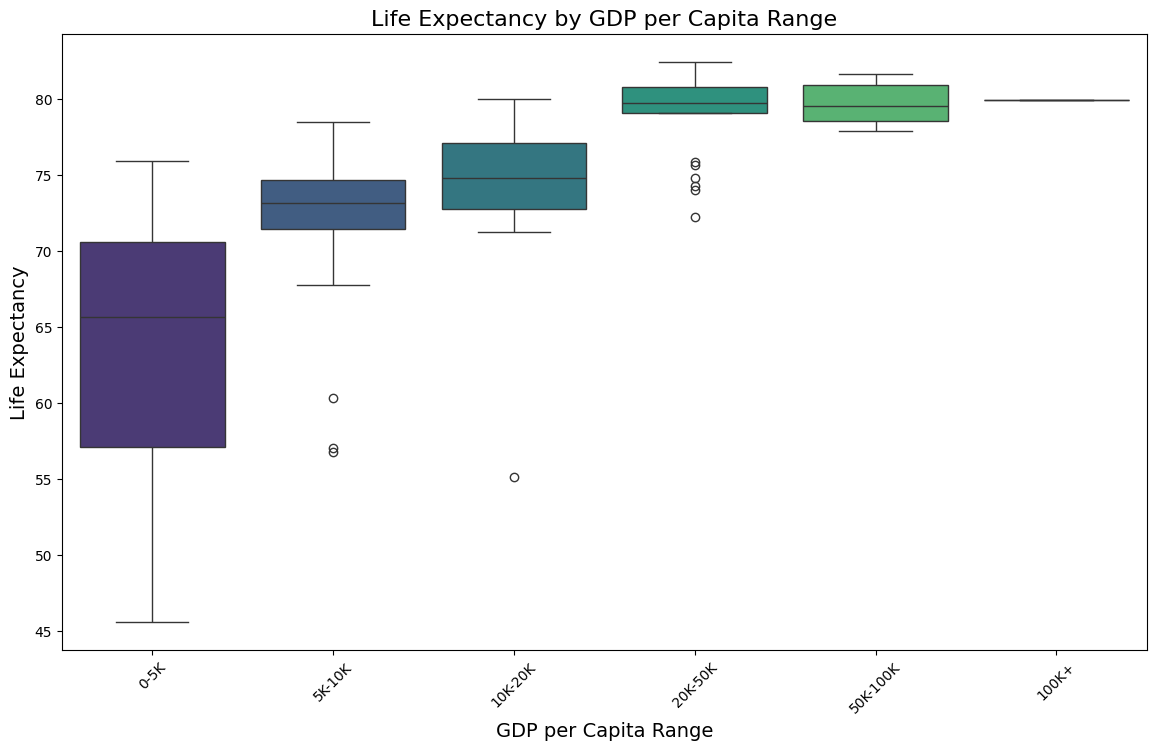

In [30]:
# GDP per capita를 구간별로 나누기
df['GDP_per_capita_range'] = pd.cut(df['GDP_per_capita'], bins=[0, 5000, 10000, 20000, 50000, 100000, float('inf')], labels=['0-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+'])

plt.figure(figsize=(14, 8))
sns.boxplot(x='GDP_per_capita_range', y='Life_expectancy', data=df, palette='viridis')
plt.title('Life Expectancy by GDP per Capita Range', fontsize=16)
plt.xlabel('GDP per Capita Range', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.xticks(rotation=45)
plt.show()

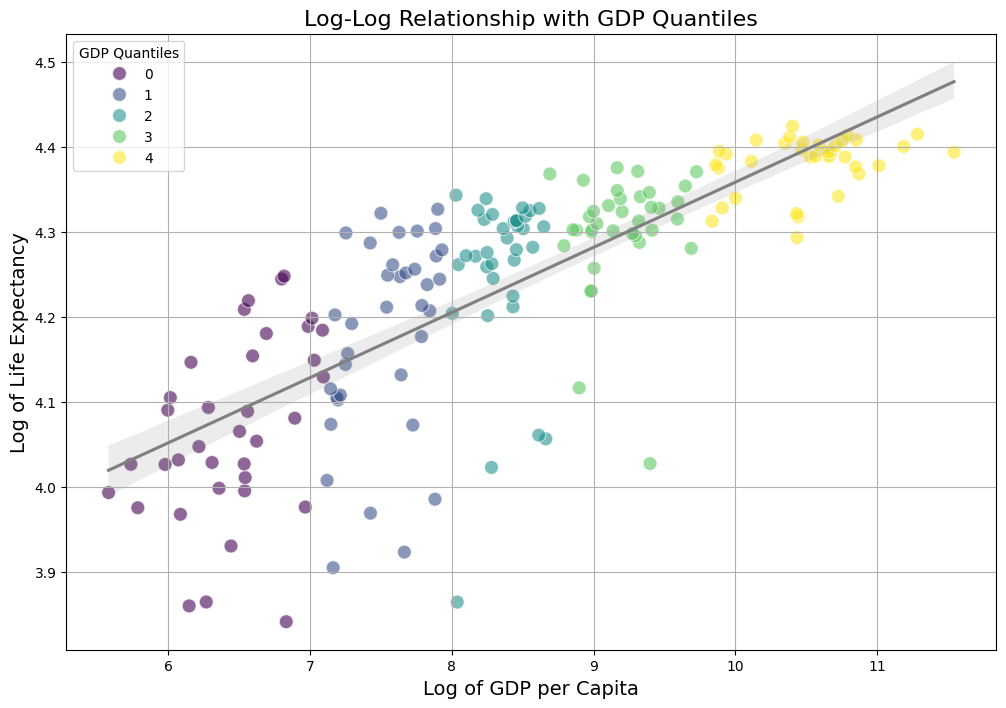

In [31]:
df['GDP_quantile'] = pd.qcut(df['GDP_per_capita'], q=5, labels=False)
# Logarithmic transformation
# GDP 로그 변환
df['Log_GDP'] = np.log1p(df['GDP_per_capita'])
# Population 로그 변환
df['Log_Population'] = np.log1p(df['Population_mln'])
# Life Expectancy 로그 변환
df['Log_Life_expectancy'] = np.log1p(df['Life_expectancy'])


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Log_GDP', y='Log_Life_expectancy', data=df, hue='GDP_quantile', palette='viridis', s=100, alpha=0.6)

# 회귀선 추가 (로그-로그 관계의 직선)
sns.regplot(x='Log_GDP', y='Log_Life_expectancy', data=df, scatter=False, line_kws={"color": "gray"})

plt.title('Log-Log Relationship with GDP Quantiles', fontsize=16)
plt.xlabel('Log of GDP per Capita', fontsize=14)
plt.ylabel('Log of Life Expectancy', fontsize=14)
plt.legend(title="GDP Quantiles")
plt.grid(True)
plt.show()

In [32]:
world = gpd.read_file("./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
name_changes = {
    'United Republic of Tanzania': 'Tanzania',
    'Western Sahara': 'Sahrawi Arab Democratic Republic',
    'United States of America': 'United States',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Sudan': 'Sudan',
    'Russia': 'Russian Federation',
    'The Bahamas': 'Bahamas, The',
    'Falkland Islands': 'Falkland Islands (Malvinas)',
    'Greenland': 'Greenland',
    'French Southern and Antarctic Lands': 'French Southern and Antarctic Lands',
    'East Timor': 'Timor-Leste',
    'Venezuela': 'Venezuela, RB',
    'Puerto Rico': 'Puerto Rico',
    'Ivory Coast': "Cote d'Ivoire",
    'Republic of the Congo': 'Congo, Rep.',
    'eSwatini': 'Eswatini',
    'Palestine': 'Palestine',
    'Gambia': 'Gambia, The',
    'Laos': 'Lao PDR',
    'North Korea': 'Korea, Dem. People\'s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Iran': 'Iran, Islamic Rep.',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'New Caledonia': 'New Caledonia',
    'Taiwan': 'Taiwan (Province of China)',
    'Brunei': 'Brunei Darussalam',
    'Slovakia': 'Slovak Republic',
    'Yemen': 'Yemen, Rep.',
    'Antarctica': 'Antarctica',
    'Northern Cyprus': 'Northern Cyprus',
    'Egypt': 'Egypt, Arab Rep.',
    'Somaliland': 'Somaliland',
    'Republic of Serbia': 'Serbia',
    'Kosovo': 'Kosovo',
    'South Sudan': 'South Sudan'
}

# ADMIN 열의 값을 변경
world['ADMIN'] = world['ADMIN'].replace(name_changes)
merged = world.merge(df, left_on="ADMIN", right_on="Country", how="left")


* 나라 별로 기대수명을 시각화 해본 결과

대륙 - 지역 별로 비슷한 기대수명을 공유하는 경향이 보였다.

##### 4-2 지역(대륙)별 기대수명

* 지역(대륙별) 기대수명 분포를 확인하기 위해 커널 밀도 추정으로 확인해보았다.

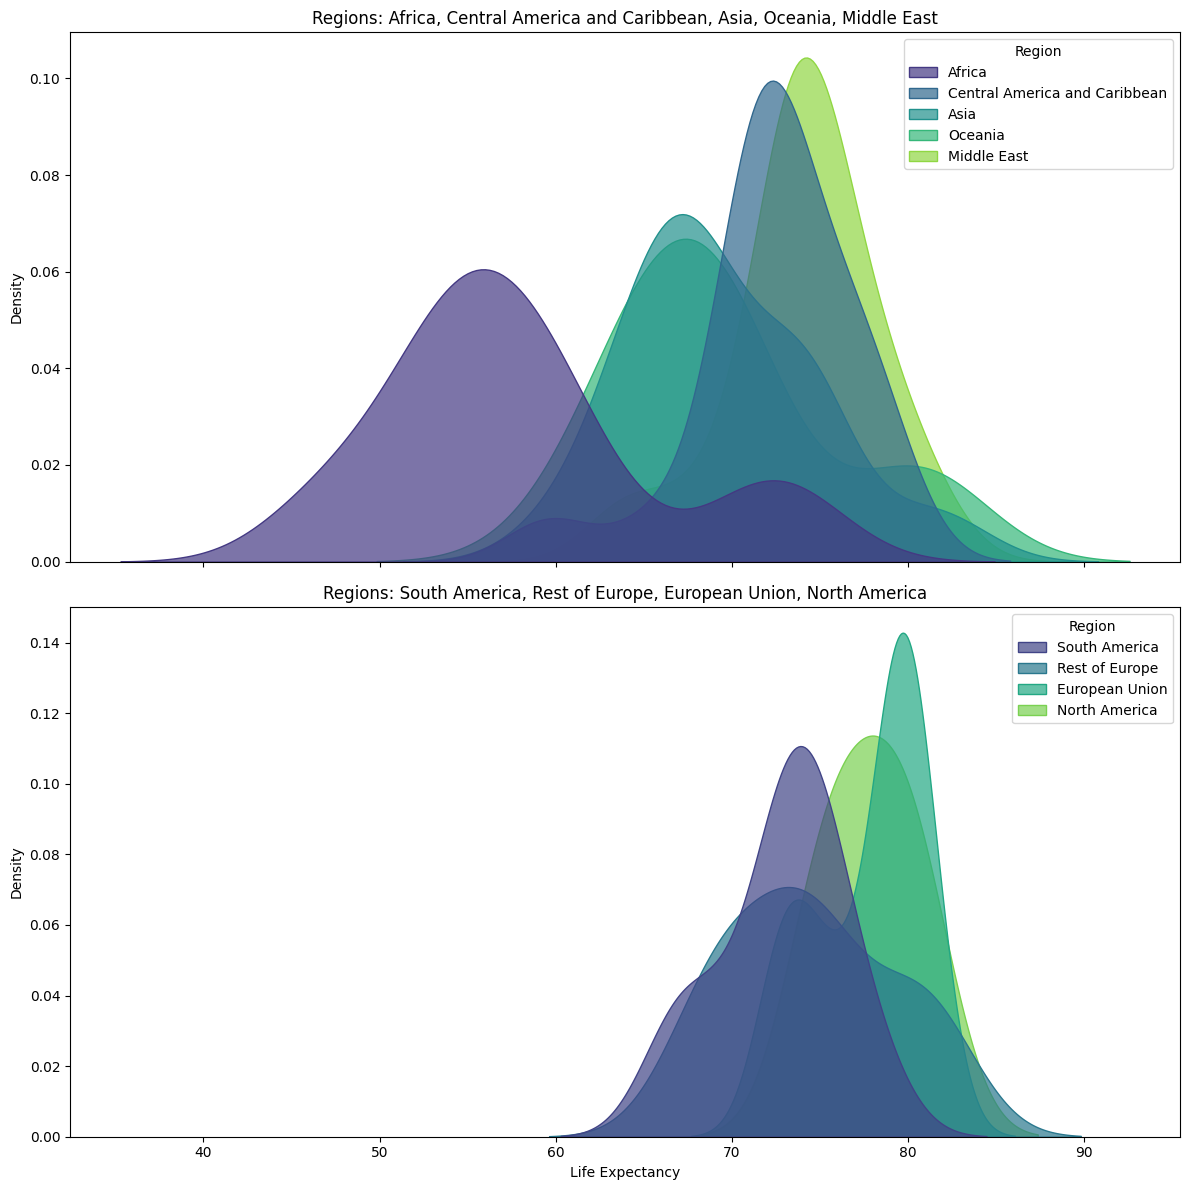

In [33]:
regions = df["Region"].unique()
n_regions = len(regions)


regions_per_subplot = 5
n_rows = int(np.ceil(n_regions / regions_per_subplot))


fig, axes = plt.subplots(n_rows, 1, figsize=(12, 6 * n_rows), sharex=True)


for i, ax in enumerate(axes):
    start_idx = i * regions_per_subplot
    end_idx = start_idx + regions_per_subplot
    selected_regions = regions[start_idx:end_idx]


    subset = df[df["Region"].isin(selected_regions)]
    
    sns.kdeplot(
        data=subset,
        x="Life_expectancy",
        hue="Region",
        fill=True,
        palette="viridis",
        alpha=0.7,
        common_norm=False,
        ax=ax,
    )
    
    ax.set_title(f"Regions: {', '.join(selected_regions)}", fontsize=12)
    ax.set_xlabel("Life Expectancy", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

 * **아프리카(Africa)** 지역은 가장 낮은 기대수명을 보이며, 국가 간 편차가 큰 편이다.
 * **오세아니아(Oceania)**, **유럽(Rest of Europe)**, 북아메리카(North America)는 높은 기대수명을 공유하며, 분포가 좁고 국가 간 편차가 작다.
 * **중남미 및 아시아 지역**은 중간 수준의 기대수명을 보이지만, 일부 국가는 더 높은 기대수명을 가지며 분포가 넓게 퍼져 있다.

##### 4-3 GDP, 인구수별 기대수명

 * GDP와 인구수는 boxplot과 로그 변환된 산점도, 회귀선을 통해 분석하였다.
    * ~~로그 변환을 사용한 이유는 gdp의 경우 로그 곡선형태의 산점도를 가지고 있어 비선형 관계를 더 명확하게 드러내고, 선형 패턴을 통해 직관적으로 해석하기 위해 사용~~
    * ~~인구수의 경우 대부분 낮은 인구수에 밀집하고 소수의 값이 높은 인구수에 분포하고 있어 로그 변환을 통해 데이터를 정규화해 데이터 분포를 개선하여 선형 관계를 파악하기 위해 로그 변환을 사용~~

**축약하면 선형관계를 더 직관적으로 파악하여 해석하기 위해 로그 변환 사용**

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\973725136.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29428\973725136.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


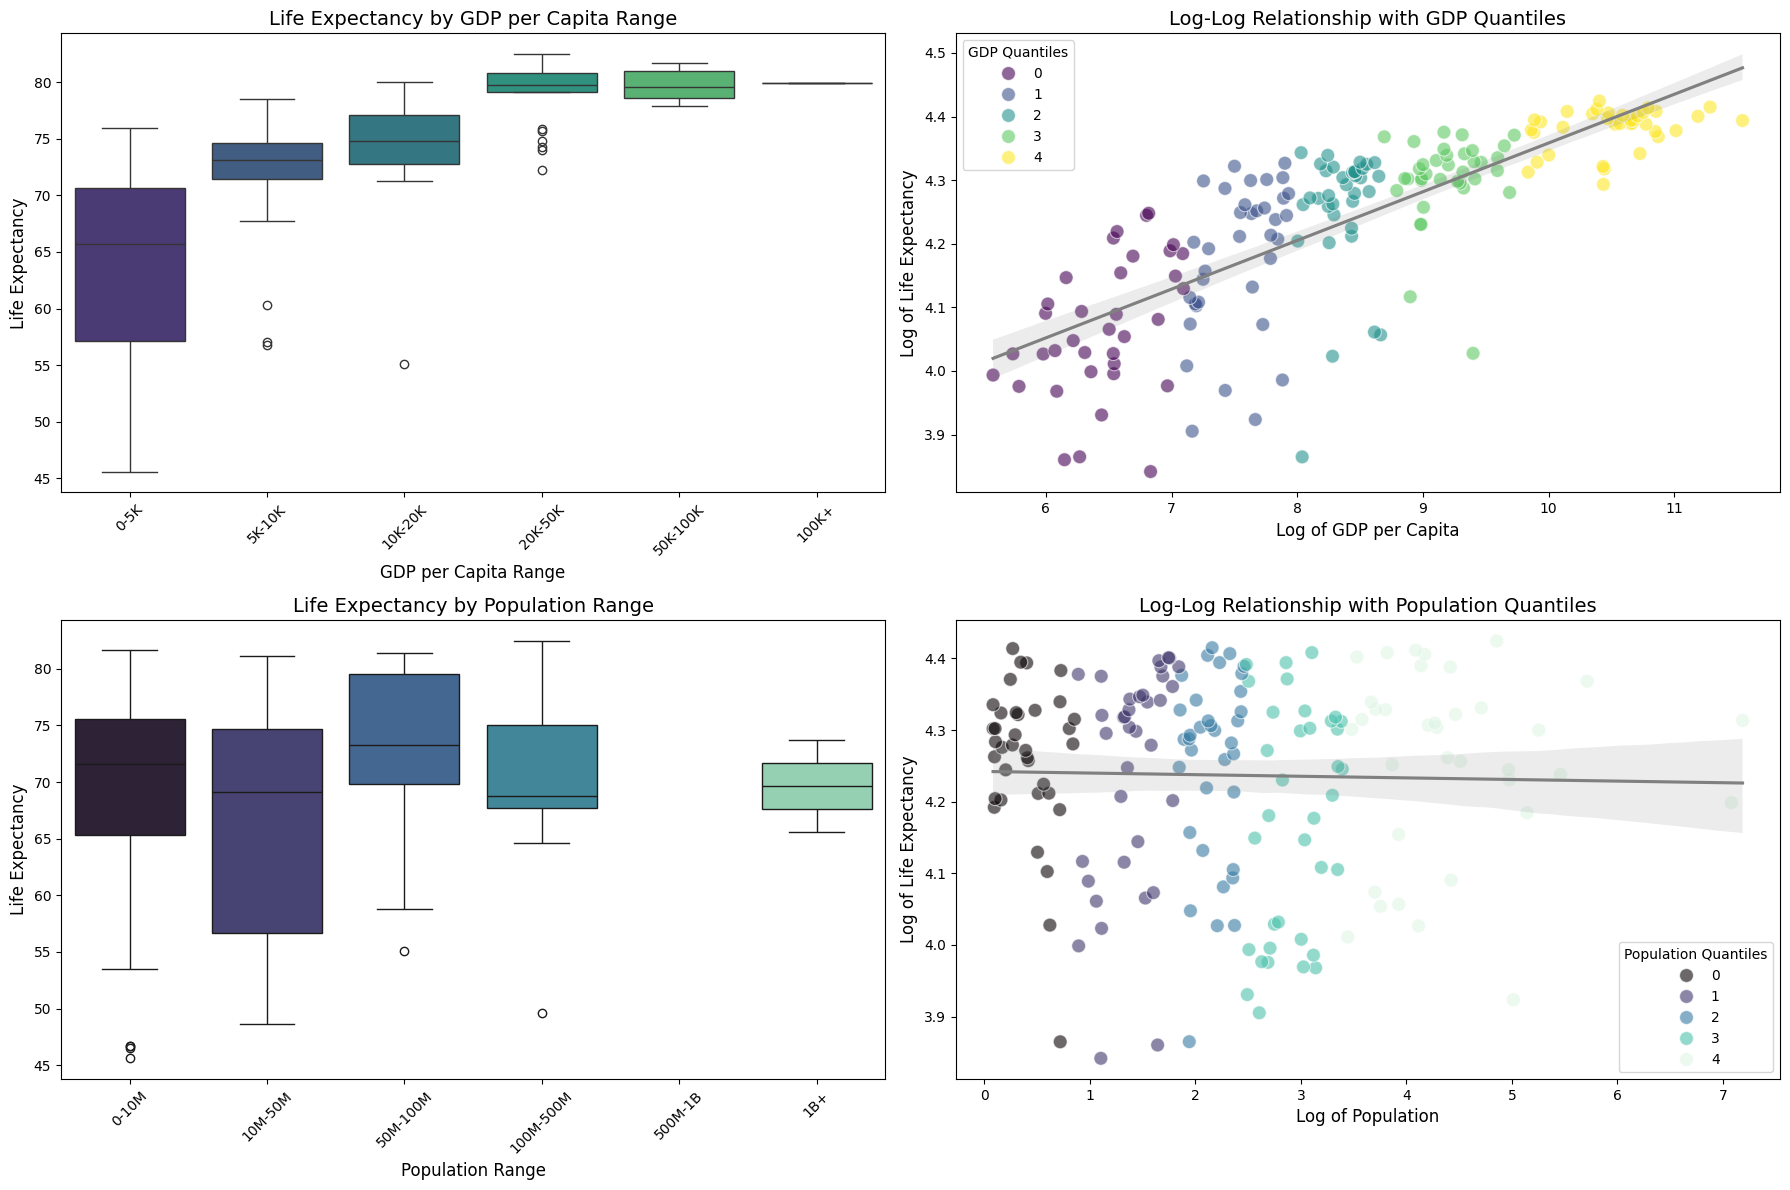

In [34]:

# GDP per Capita Range 구간별로 나누기
df['GDP_per_capita_range'] = pd.cut(df['GDP_per_capita'], bins=[0, 5000, 10000, 20000, 50000, 100000, float('inf')], labels=['0-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+'])

# GDP per Capita 분위수 계산
df['GDP_quantile'] = pd.qcut(df['GDP_per_capita'], q=5, labels=False)

# Population_mln 구간별로 나누기
df['Population_range'] = pd.cut(df['Population_mln'], bins=[0, 10, 50, 100, 500, 1000, float('inf')], labels=['0-10M', '10M-50M', '50M-100M', '100M-500M', '500M-1B', '1B+'])

# Population 분위수 계산
df['Population_quantile'] = pd.qcut(df['Population_mln'], q=5, labels=False)


# Figure 설정
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Life Expectancy by GDP per Capita Range
sns.boxplot(
    x='GDP_per_capita_range', 
    y='Life_expectancy', 
    data=df, 
    palette='viridis', 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Life Expectancy by GDP per Capita Range', fontsize=14)
axes[0, 0].set_xlabel('GDP per Capita Range', fontsize=12)
axes[0, 0].set_ylabel('Life Expectancy', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Log-Log Relationship with GDP Quantiles
sns.scatterplot(
    x='Log_GDP', 
    y='Log_Life_expectancy', 
    data=df, 
    hue='GDP_quantile', 
    palette='viridis', 
    s=100, 
    alpha=0.6, 
    ax=axes[0, 1]
)
sns.regplot(
    x='Log_GDP', 
    y='Log_Life_expectancy', 
    data=df, 
    scatter=False, 
    line_kws={"color": "gray"}, 
    ax=axes[0, 1]
)
axes[0, 1].set_title('Log-Log Relationship with GDP Quantiles', fontsize=14)
axes[0, 1].set_xlabel('Log of GDP per Capita', fontsize=12)
axes[0, 1].set_ylabel('Log of Life Expectancy', fontsize=12)
axes[0, 1].legend(title="GDP Quantiles")

# 3. Life Expectancy by Population Range
sns.boxplot(
    x='Population_range', 
    y='Life_expectancy', 
    data=df, 
    palette='mako', 
    ax=axes[1, 0]
)
axes[1, 0].set_title('Life Expectancy by Population Range', fontsize=14)
axes[1, 0].set_xlabel('Population Range', fontsize=12)
axes[1, 0].set_ylabel('Life Expectancy', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Log-Log Relationship with Population Quantiles
sns.scatterplot(
    x='Log_Population', 
    y='Log_Life_expectancy', 
    data=df, 
    hue='Population_quantile', 
    palette='mako', 
    s=100, 
    alpha=0.6, 
    ax=axes[1, 1]
)
sns.regplot(
    x='Log_Population', 
    y='Log_Life_expectancy', 
    data=df, 
    scatter=False, 
    line_kws={"color": "gray"}, 
    ax=axes[1, 1]
)
axes[1, 1].set_title('Log-Log Relationship with Population Quantiles', fontsize=14)
axes[1, 1].set_xlabel('Log of Population', fontsize=12)
axes[1, 1].set_ylabel('Log of Life Expectancy', fontsize=12)
axes[1, 1].legend(title="Population Quantiles")

# Layout 조정
plt.tight_layout()
plt.show()

* GDP에 따른 기대수명 변화
    * GDP가 낮은 구간에서는 기대수명이 상대적으로 낮고 변동폭도 크다.
    * GDP가 증가할수록 기대수명이 뚜렷하게 상승하며, 변동폭이 감소한다.특히 20K 이상 구간에서는 기대수명이 75세 이상으로 안정화되며, GDP가 더 증가해도 큰 변화는 없다.
    * 회귀선을 기준으로 데이터가 고르게 분포하여 상관관계가 뚜렷함을 알 수 있다.

* 인구수에 따른 기대수명 변화
    * 인구가 적은 나라는 기대수의 분포가 넓고 국가 간 편차가 크다. 반대로 인구가 많은 나라는 기대수명이 상대적으로 좁은 범위에 걸쳐져 있다.
    * 로그 변환된 인구와 기대수명 간에 회귀선의 기울기가 수평에 가까워 뚜렷한 상관관계는 발견되지 않았다.


    해석

    * 초기 단계에서는 GDP 상승이 기대수명을 크게 증가시키는 요인으로 작용한다.
    * 그러나 일정 수준(GDP 20K 이상) 이상에서는 기대수명이 포화 상태에 가까워지는 경향이 있다.
    * 인구수는 기대수명에 뚜렷한 영향을 주는 요인은 아니며, 관계가 약한 것으로 보입니다.
    * 다만 인구가 많은 나라일수록 기대수명이 비교적 안정적인 범위에 분포하는 경향이 있습니다.


## 재혁님 eda